**Final Project: Final Project: COVID-19 and Its Effect on the Stock Market** 

by Ke Zhang, Vu Vinh, Huijuan Zheng

The goal of this project is to analyze the effects of COVID-19 on the global stock market using data-driven insights. We created visualizations and reports that demonstrate trends and correlations between the pandemic and selected stock performances.

Contributions:

Ke Zhang: FetchData, Research and Select Stocks and Combine COVID-19 and Stock Market Data.

Vinh Vu: Create Visualizations - Line Graphs, Histograms and Boxplots

Huijuan Zheng: Create Visualizations - Scatter Plots, Bar Charts and Candlestick charts

In [1]:
!pip install yfinance
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import yfinance as yf              # a popular open source library to access the financial data available on Yahoo Finance
import matplotlib.pyplot as plt
import mplfinance as mpf           # a financial charting library of matplotlib

**STEPS:**
2.   Read the daily confirmed cases and deaths into two dataframes can be found at this github page:


> a)	Confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"




  > b)	deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


3. Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level






In [3]:
# URLs for confirmed cases and deaths data of COVID-19
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into DataFrames
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)


In [4]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [6]:
# Convert the date columns of confirmed_cases into a proper datetime format for further analysis and visualization.
confirmed_cases_format = confirmed_cases.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Confirmed"
)
confirmed_cases_format["Date"] = pd.to_datetime(confirmed_cases_format["Date"])
confirmed_cases_format.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\2658637181.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_cases_format["Date"] = pd.to_datetime(confirmed_cases_format["Date"])


,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


In [7]:
# Convert the date columns of deaths into a proper datetime format for further analysis and visualization.
deaths_format = deaths.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Deaths"
)
deaths_format["Date"] = pd.to_datetime(deaths_format["Date"])
deaths_format.head()



C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\3494799303.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_format["Date"] = pd.to_datetime(deaths_format["Date"])


,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0



4. Research a stock for each below that reflects the following industries (it will be used in the next step):

> a) Overall American Market

> b) Overall Canadian Market

> c) Travel sector

> d) The Real Estate sector

> e) Precious metals (Gold, Silver, Platinum, etc)

5. Use AlphaVantage or other website to get the daily high and low prices for your selected stocks


In [8]:
import pandas as pd
import yfinance as yf

# Define the stocks and their symbols
stocks = {
    'S&P/TSX Composite index': '^GSPTSE',    # representing roughly 70% of the total market capitalization on the Toronto Stock Exchange
    'Pfizer': 'PFE',                         # an American multinational pharmaceutical corporation that developed the Covid-19 vaccine
    'Canadian Tire': 'CTC.TO',                # Canadian Tire, a stock of Canada Market, Toronto Stock Exchange
    'Air Canada': 'AC.TO',                    # Air Canada, Toronto Stock Exchange - Travel sector
    'Choice Properties REIT': 'CHP-UN.TO',    # Choice Properties REIT, Toronto Stock Exchange - The Real Estate sector
    'SPDR Gold Trust ETF': 'GLD'              # SPDR Gold Trust ETF - Precious metals
}

# Define the date range (from start_date to the date before end_date)
start_date = '2020-01-22'
end_date = '2023-03-09'

# Create an empty DataFrame to store the data
stock_data = pd.DataFrame()

for stock_name, symbol in stocks.items():
    # Download historical data
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')

    if data.empty:
        print(f"No data for {symbol}, skipping...")
        continue

    # Flatten columns if MultiIndex (sometimes happens with adjusted close)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    # Reset index to turn the Date index into a column
    data = data.reset_index()

    # Add Stock and Symbol
    data['Stock'] = stock_name
    data['Symbol'] = symbol

    # Keep only desired columns
    columns_to_keep = ['Date', 'Stock', 'Symbol', 'High', 'Low', 'Open', 'Close']
    data = data[[col for col in columns_to_keep if col in data.columns]]

    # Append to main DataFrame
    stock_data = pd.concat([stock_data, data], ignore_index=True)

# Save to CSV
stock_data.to_csv('stock_data.csv', index=False)

# Preview
stock_data


C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\470149648.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\470149648.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\470149648.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\470149648.py:23: FutureWarning: YF.download() has changed argument auto_adjust d

Price,Date,Stock,Symbol,High,Low,Open,Close
0,2020-01-22,S&P/TSX Composite index,^GSPTSE,17666.500000,17558.000000,17570.300781,17599.900391
1,2020-01-23,S&P/TSX Composite index,^GSPTSE,17621.800781,17540.800781,17564.800781,17621.800781
2,2020-01-24,S&P/TSX Composite index,^GSPTSE,17646.400391,17514.699219,17629.400391,17565.300781
3,2020-01-27,S&P/TSX Composite index,^GSPTSE,17466.099609,17360.000000,17376.800781,17442.500000
4,2020-01-28,S&P/TSX Composite index,^GSPTSE,17519.000000,17456.099609,17475.000000,17500.900391
...,...,...,...,...,...,...,...
4711,2023-03-02,SPDR Gold Trust ETF,GLD,170.979996,170.360001,170.520004,170.660004
4712,2023-03-03,SPDR Gold Trust ETF,GLD,172.600006,170.979996,171.449997,172.490005
4713,2023-03-06,SPDR Gold Trust ETF,GLD,172.369995,171.539993,172.320007,171.619995
4714,2023-03-07,SPDR Gold Trust ETF,GLD,170.470001,168.520004,170.419998,168.619995


**Insight**: From end of Mar 2020 to end of Jun 2021, there is a strong positive correlation between S&P/TSX Composite index and number of Covid-19 confirmed cases.


6. Combine COVID-19 and Stock Market Data

• Append the stock market data to the COVID-19 aggregated dataframe.

• Align stock prices and COVID-19 data by date to allow for meaningful comparisons.



In [9]:
# Reset index to make 'Date' a column
stock_data_reset = stock_data.reset_index()
stock_data_reset['Date'] = pd.to_datetime(stock_data_reset['Date'])

# Append the stock market data to the COVID-19 aggregated dataframe from end of Mar 2020 to end of Jun 2021
stock_data_filtered = stock_data_reset[(stock_data_reset['Date'] >= '2020-03-31') & (stock_data_reset['Date'] <= '2021-06-30')]

# Merge with confirmed cases
covid_stock_data = confirmed_cases_format.merge(
    stock_data_filtered,
    on='Date',
    how='inner'
)
covid_stock_data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,index,Stock,Symbol,High,Low,Open,Close
0,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,48,S&P/TSX Composite index,^GSPTSE,13557.599609,13083.900391,13083.900391,13378.799805
1,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,833,Pfizer,PFE,23.810738,23.262370,23.377816,23.550985
2,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,1621,Canadian Tire,CTC.TO,156.785477,156.785477,156.785477,156.785477
3,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,2406,Air Canada,AC.TO,16.719999,15.500000,16.270000,15.750000
4,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,3191,Choice Properties REIT,CHP-UN.TO,9.709773,9.095511,9.125115,9.561759


Step 6: Create Visualizations
Using the provided dataset containing global COVID-19 statistics and stock price data (Date, High, Low, Ticker, Confirmed, Deaths), create the following visualizations:



1. Line Graphs:
   - Show trends in global confirmed cases and deaths over time.
   - Plot stock prices (high and low) over time for each selected stock.

Date range: 2020-01-22 to 2023-03-09
Total confirmed cases: 676,570,149
Total deaths: 6,881,802


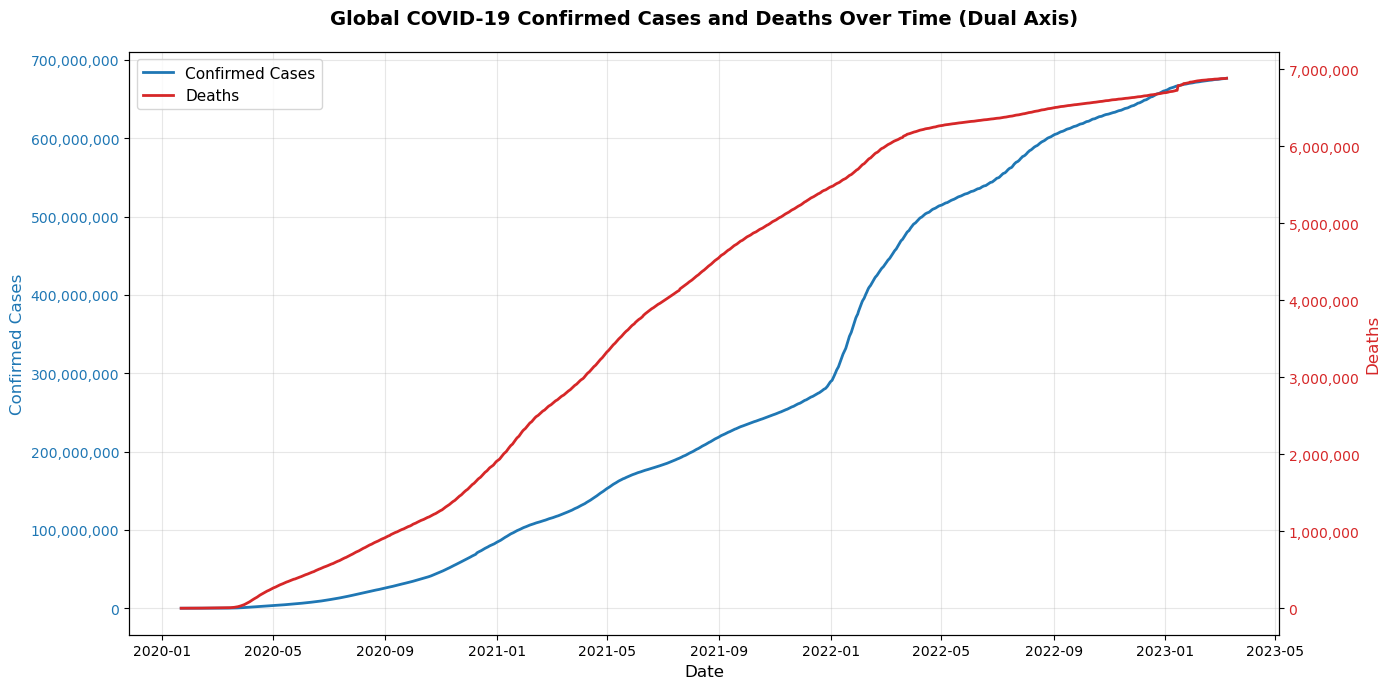

In [10]:
# 1. Line Graphs:
#  Show trends in global confirmed cases and deaths over time get total countries data
import matplotlib.ticker as ticker

global_confirmed = confirmed_cases_format.groupby('Date')['Confirmed'].sum().reset_index()
global_deaths = deaths_format.groupby('Date')['Deaths'].sum().reset_index()

print(f"Date range: {global_confirmed['Date'].min().strftime('%Y-%m-%d')} to {global_confirmed['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total confirmed cases: {global_confirmed['Confirmed'].max():,}")
print(f"Total deaths: {global_deaths['Deaths'].max():,}")

# Create figure with dual y-axes to show both scales properly
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot confirmed cases on left y-axis
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Confirmed Cases', color=color, fontsize=12)
ax1.plot(global_confirmed['Date'], global_confirmed['Confirmed'], 
         label='Confirmed Cases', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Format left y-axis with comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Create second y-axis for deaths
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Deaths', color=color, fontsize=12)
ax2.plot(global_deaths['Date'], global_deaths['Deaths'], 
         label='Deaths', color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Format right y-axis with comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add title and legends
plt.title('Global COVID-19 Confirmed Cases and Deaths Over Time (Dual Axis)', 
          fontsize=14, fontweight='bold', pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

fig.tight_layout()
plt.show()



**Graph Choice**

A line graph with dual y-axes was used to show trends in global COVID-19 confirmed cases and deaths over time. The dual axes allow comparing variables with different magnitudes on the same plot.

**Insights**

Confirmed cases rose steeply from early 2020, showing multiple waves.

Deaths follow a similar trend but at a lower scale.


**Observed Patterns**

Strong positive correlation between cases and deaths.

Deaths increased more slowly than cases over time, reflecting better treatment and vaccination.

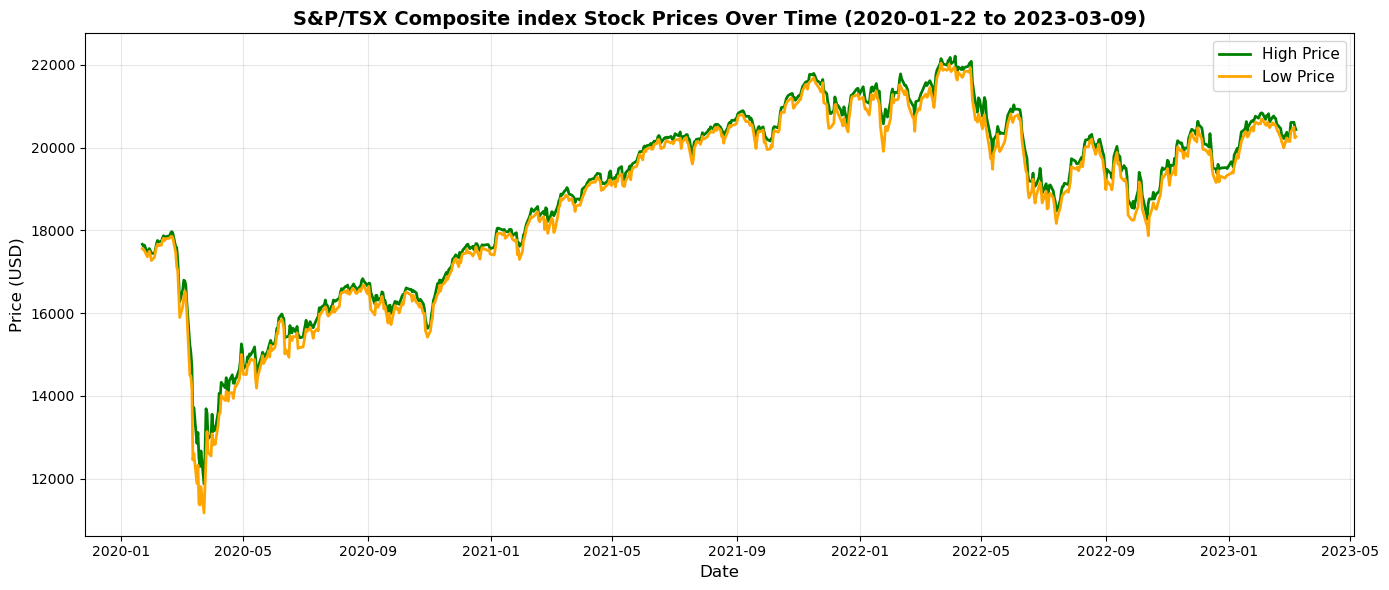

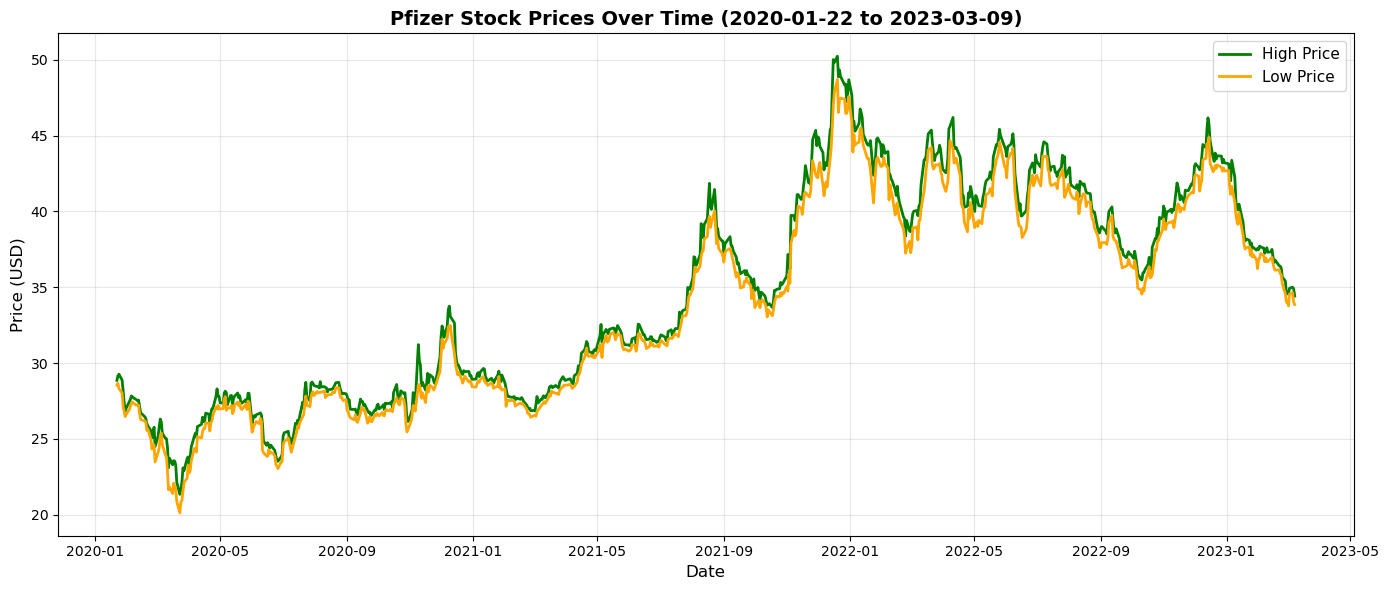

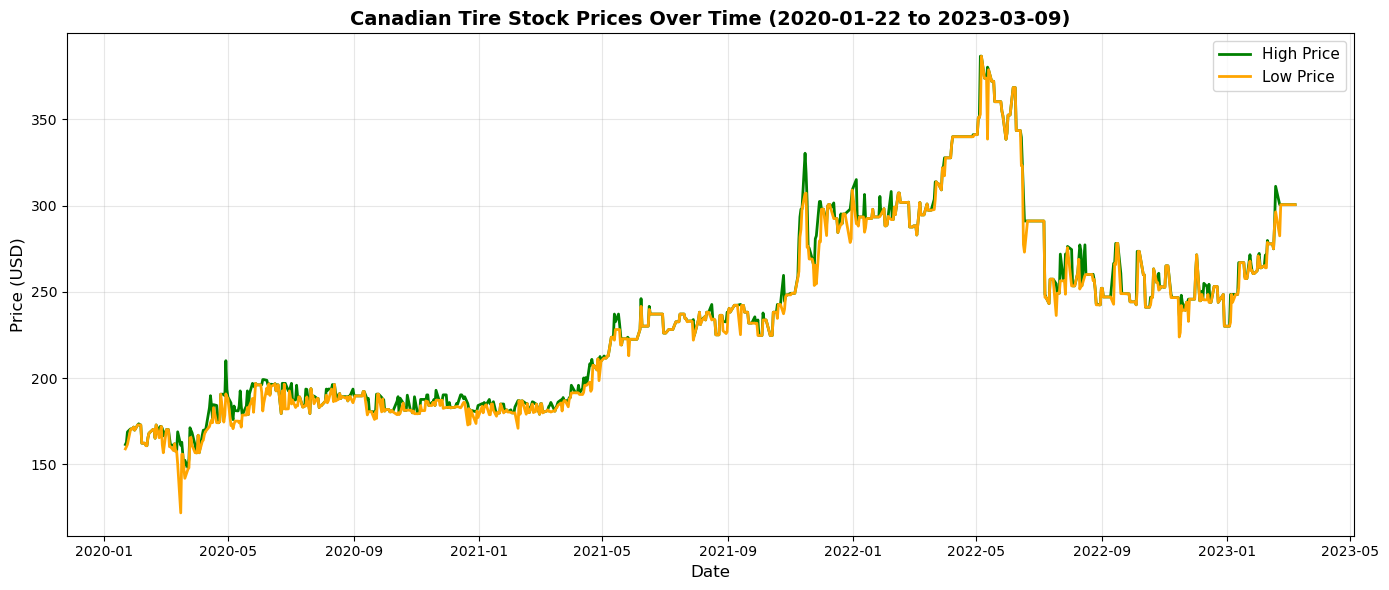

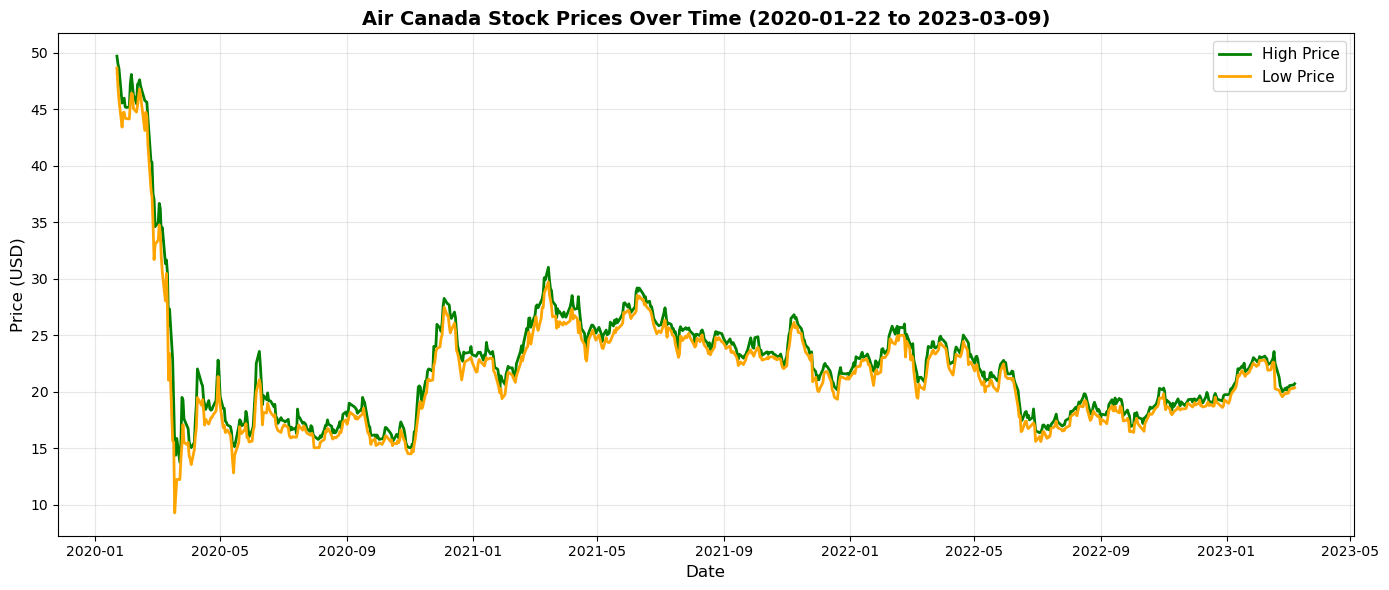

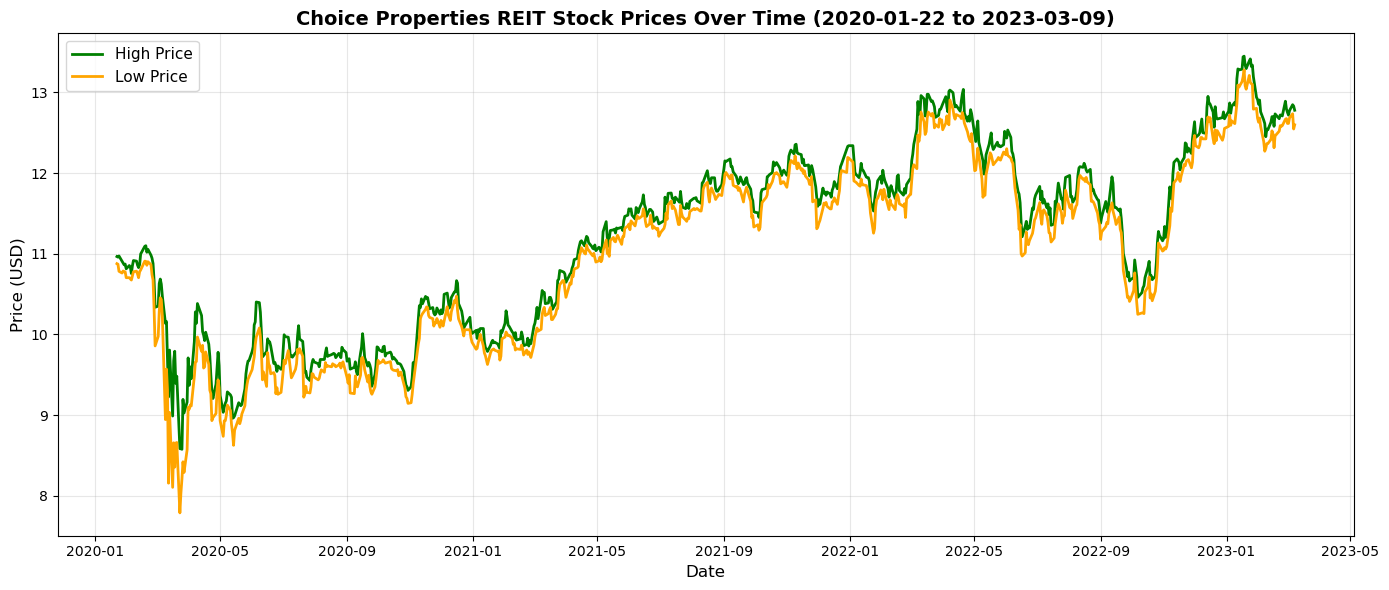

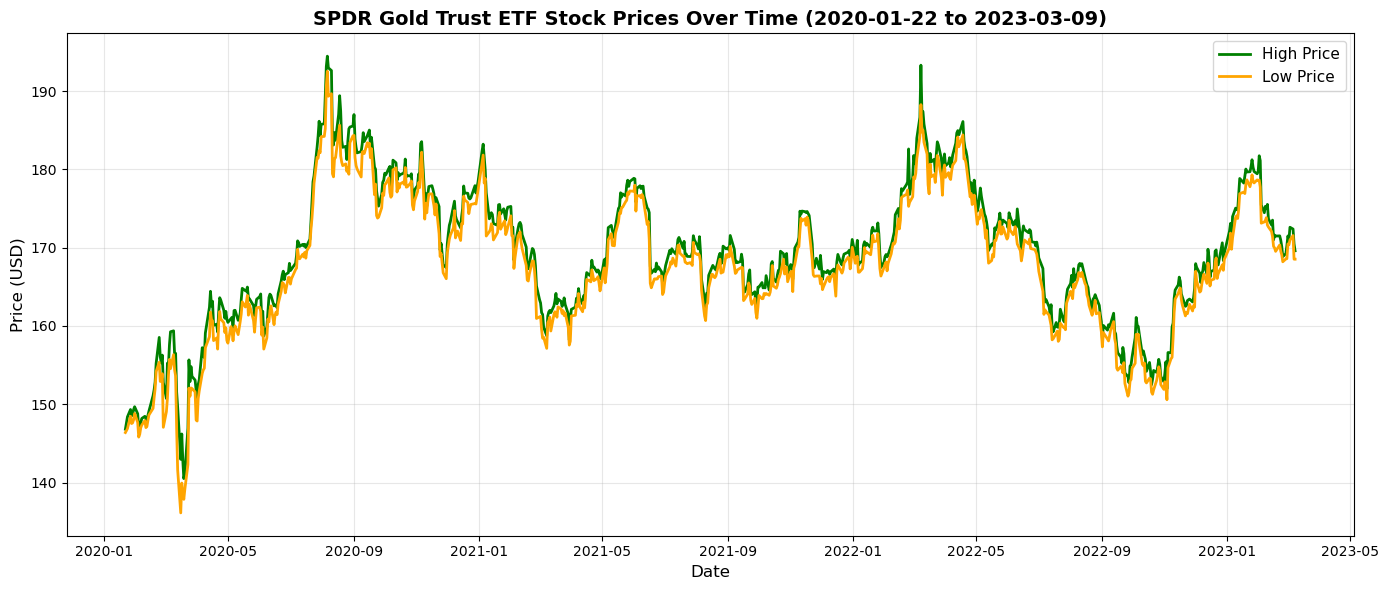

In [11]:
# Plot stock prices (high and low) over time for each selected stock.
# Filter stock data to match the COVID-19 date range (2020-01-22 to 2023-03-09)
stock_data_filtered = stock_data[(stock_data['Date'] >= '2020-01-22') & (stock_data['Date'] <= '2023-03-09')]

# Flatten the multi-level columns if needed
if isinstance(stock_data_filtered.columns, pd.MultiIndex):
    stock_data_filtered.columns = ['_'.join(col).strip('_') for col in stock_data_filtered.columns.values]

for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    
    # Handle column names that may or may not have the symbol suffix
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    
    plt.figure(figsize=(14, 6))
    plt.plot(stock_df['Date'], stock_df[high_col], label='High Price', color='green', linewidth=2)
    plt.plot(stock_df['Date'], stock_df[low_col], label='Low Price', color='orange', linewidth=2)
    plt.title(f'{stock_name} Stock Prices Over Time (2020-01-22 to 2023-03-09)', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


**Graph Choice**

A line graph was used to show high and low stock prices over time for each selected stock. Line graphs clearly display trends and fluctuations, making it easy to track price movements over the period.

**Insights**

Each stock shows distinct patterns: some have steady growth, while others exhibit volatility.

Peaks and troughs often align with major market events or economic shifts.

**Observed Patterns**

High and low prices generally move together, with the spread indicating daily volatility.

Some stocks, like indices or ETFs, show smoother trends, while individual companies like Air Canada show sharp swings reflecting sector-specific impacts.

2. Histograms:
   - Display the distribution of daily changes in stock prices (e.g., daily highs minus daily lows).


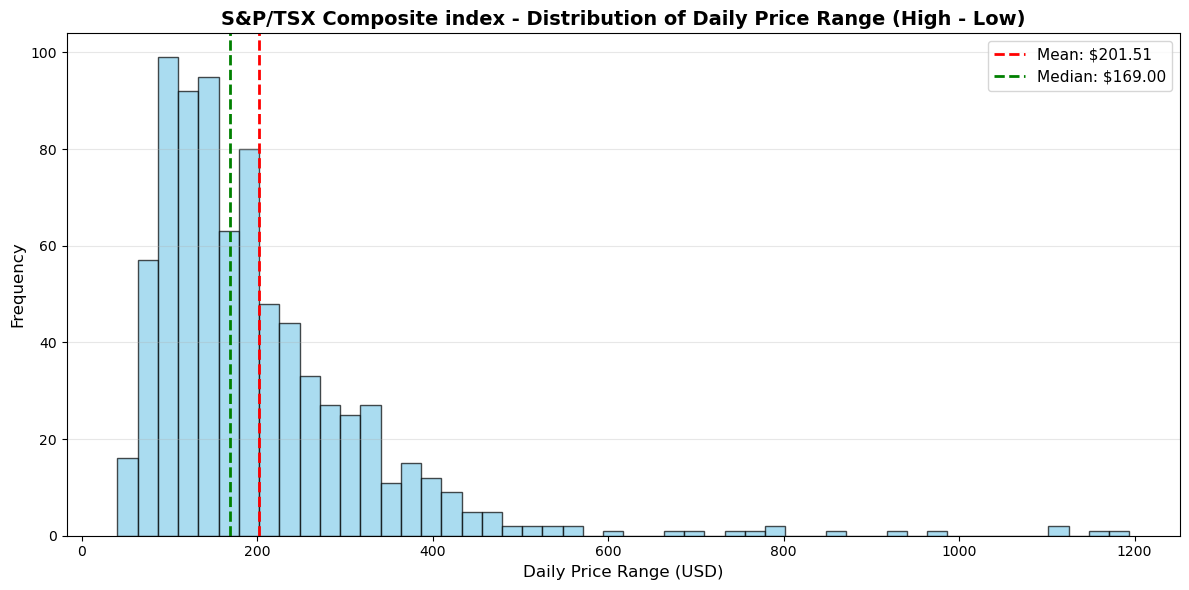


S&P/TSX Composite index Statistics:
  Mean Daily Range: $201.51
  Median Daily Range: $169.00
  Min Daily Range: $40.60
  Max Daily Range: $1194.10
  Std Dev: $135.88


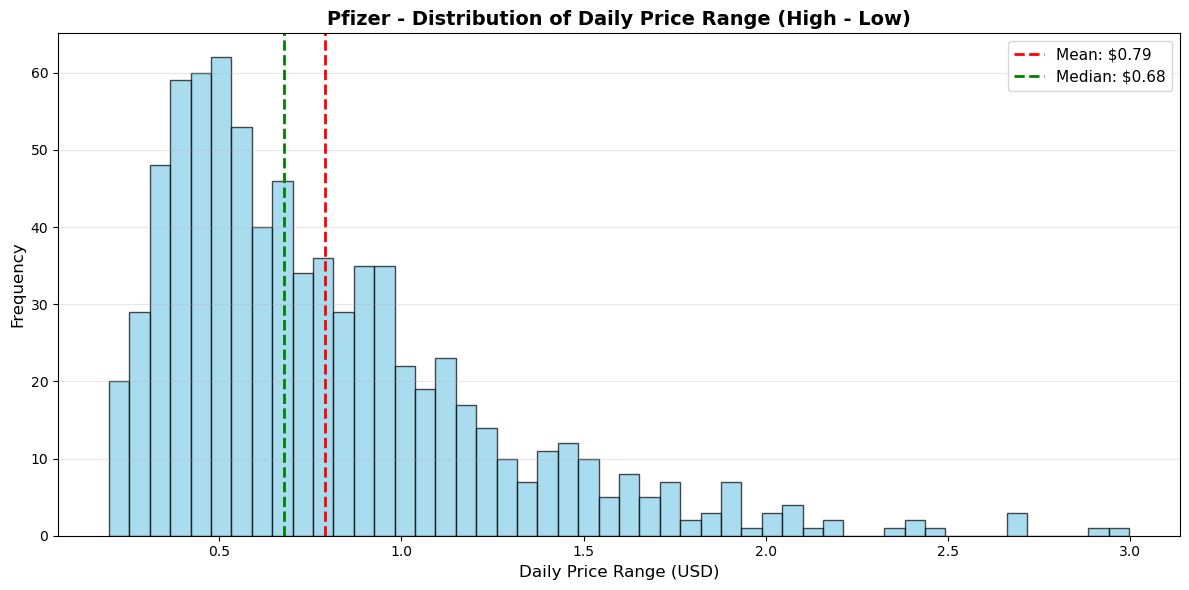


Pfizer Statistics:
  Mean Daily Range: $0.79
  Median Daily Range: $0.68
  Min Daily Range: $0.20
  Max Daily Range: $3.00
  Std Dev: $0.45


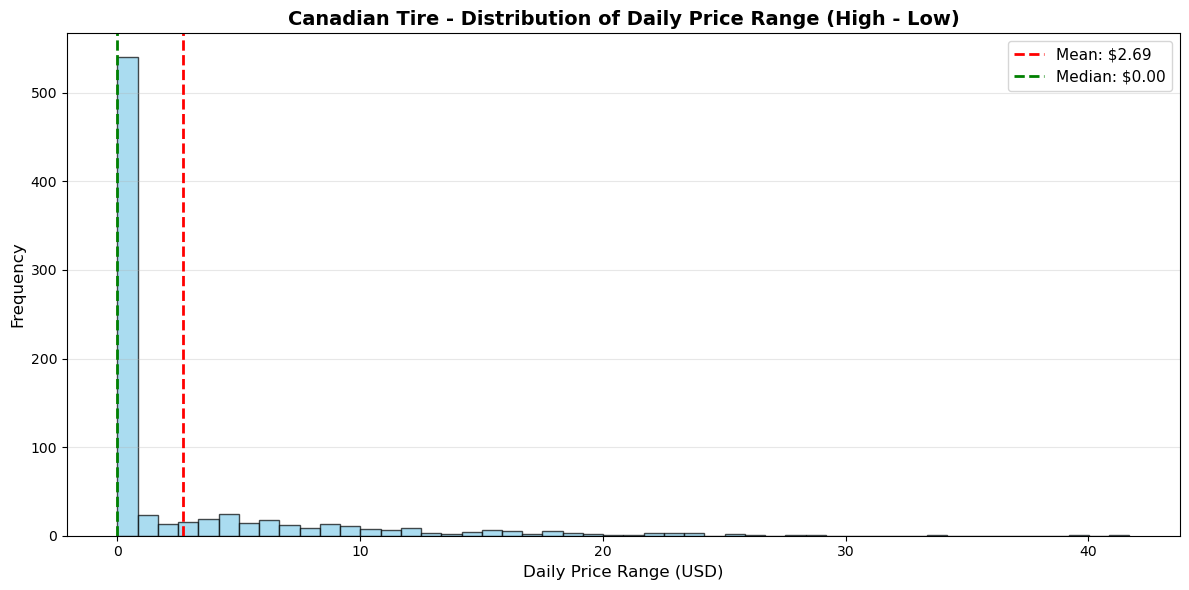


Canadian Tire Statistics:
  Mean Daily Range: $2.69
  Median Daily Range: $0.00
  Min Daily Range: $0.00
  Max Daily Range: $41.70
  Std Dev: $5.59


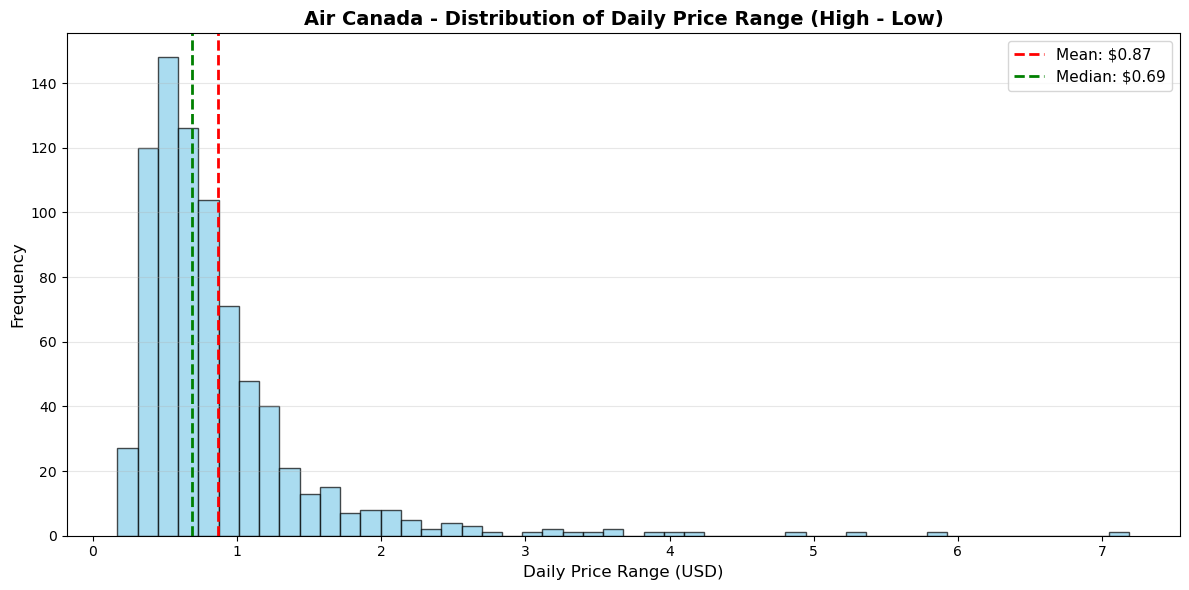


Air Canada Statistics:
  Mean Daily Range: $0.87
  Median Daily Range: $0.69
  Min Daily Range: $0.17
  Max Daily Range: $7.19
  Std Dev: $0.65


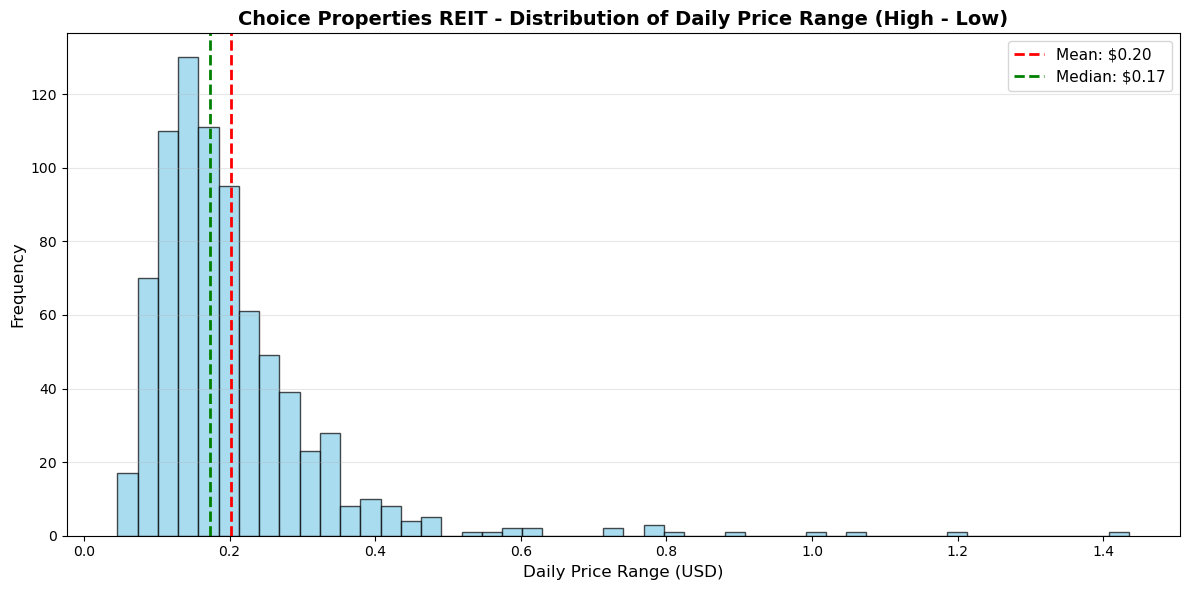


Choice Properties REIT Statistics:
  Mean Daily Range: $0.20
  Median Daily Range: $0.17
  Min Daily Range: $0.05
  Max Daily Range: $1.44
  Std Dev: $0.13


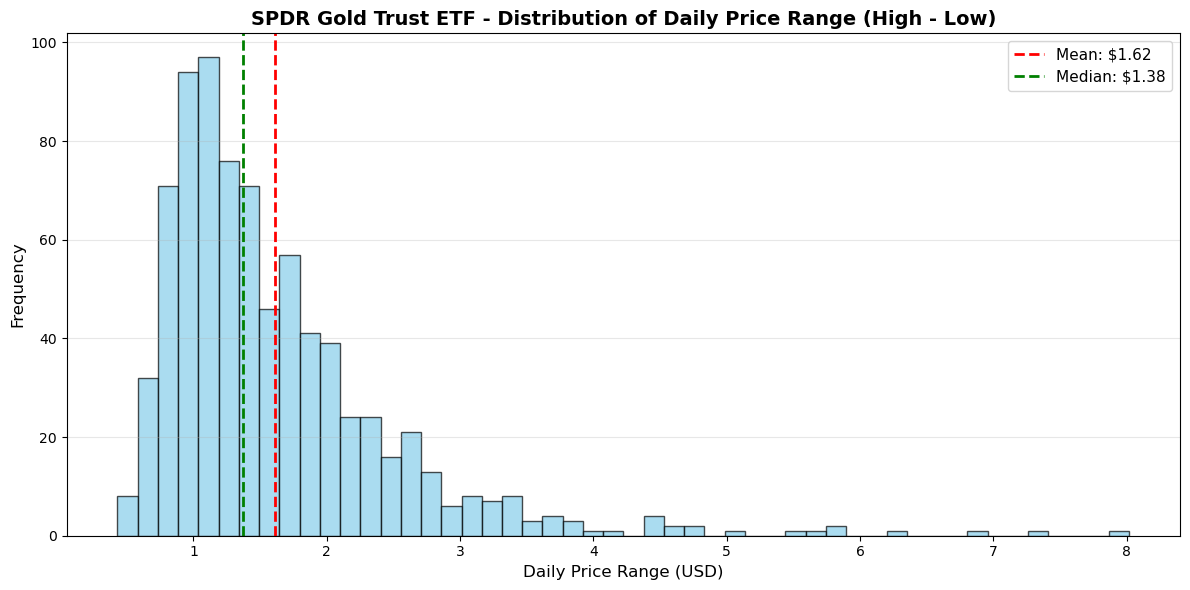


SPDR Gold Trust ETF Statistics:
  Mean Daily Range: $1.62
  Median Daily Range: $1.38
  Min Daily Range: $0.43
  Max Daily Range: $8.02
  Std Dev: $0.90


In [12]:
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    
    # Handle column names that may or may not have the symbol suffix
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    
    # Calculate daily price range (High - Low)
    stock_df['Daily_Range'] = stock_df[high_col] - stock_df[low_col]
    
    # Create histogram
    plt.figure(figsize=(12, 6))
    plt.hist(stock_df['Daily_Range'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{stock_name} - Distribution of Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
    plt.xlabel('Daily Price Range (USD)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    mean_range = stock_df['Daily_Range'].mean()
    median_range = stock_df['Daily_Range'].median()
    plt.axvline(mean_range, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_range:.2f}')
    plt.axvline(median_range, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_range:.2f}')
    
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()
    
    print(f"\n{stock_name} Statistics:")
    print(f"  Mean Daily Range: ${mean_range:.2f}")
    print(f"  Median Daily Range: ${median_range:.2f}")
    print(f"  Min Daily Range: ${stock_df['Daily_Range'].min():.2f}")
    print(f"  Max Daily Range: ${stock_df['Daily_Range'].max():.2f}")
    print(f"  Std Dev: ${stock_df['Daily_Range'].std():.2f}")


**Graph Choice**

Histograms were used to show the distribution of daily price ranges (High − Low) for each stock. Histograms effectively display how frequently different daily movements occur and highlight patterns of volatility.

**Insights from the Data**

S&P/TSX Composite Index has a wide distribution with a mean daily range of $201.51 and occasional extreme movements up to $1,194.10.

Pfizer, Air Canada, and SPDR Gold Trust ETF show moderate daily ranges, with mean values around $0.79, $0.87, and $1.62 respectively, indicating typical day-to-day fluctuations.

Canadian Tire has a median daily range of $0.00 but a maximum of $41.70, showing mostly stable days punctuated by occasional spikes.

Choice Properties REIT is the most stable, with a mean daily range of $0.20 and very few extreme values.

**Observed Patterns**

Most stocks have clusters of daily ranges near the mean, indicating typical volatility levels.

Outliers represent days with unusually large movements, often linked to major market events or sector-specific news.

Volatility differs across sectors: airlines and broad market indices show more extreme daily changes, while REITs and stable ETFs remain narrow.

3. Boxplots:
   - Construct boxplots comparing the price variability of stocks across different industries or tickers using the High, Low, or daily price range values.


C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\2970554377.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = plt.boxplot([boxplot_df[boxplot_df['Stock'] == stock]['Daily_Range'].values


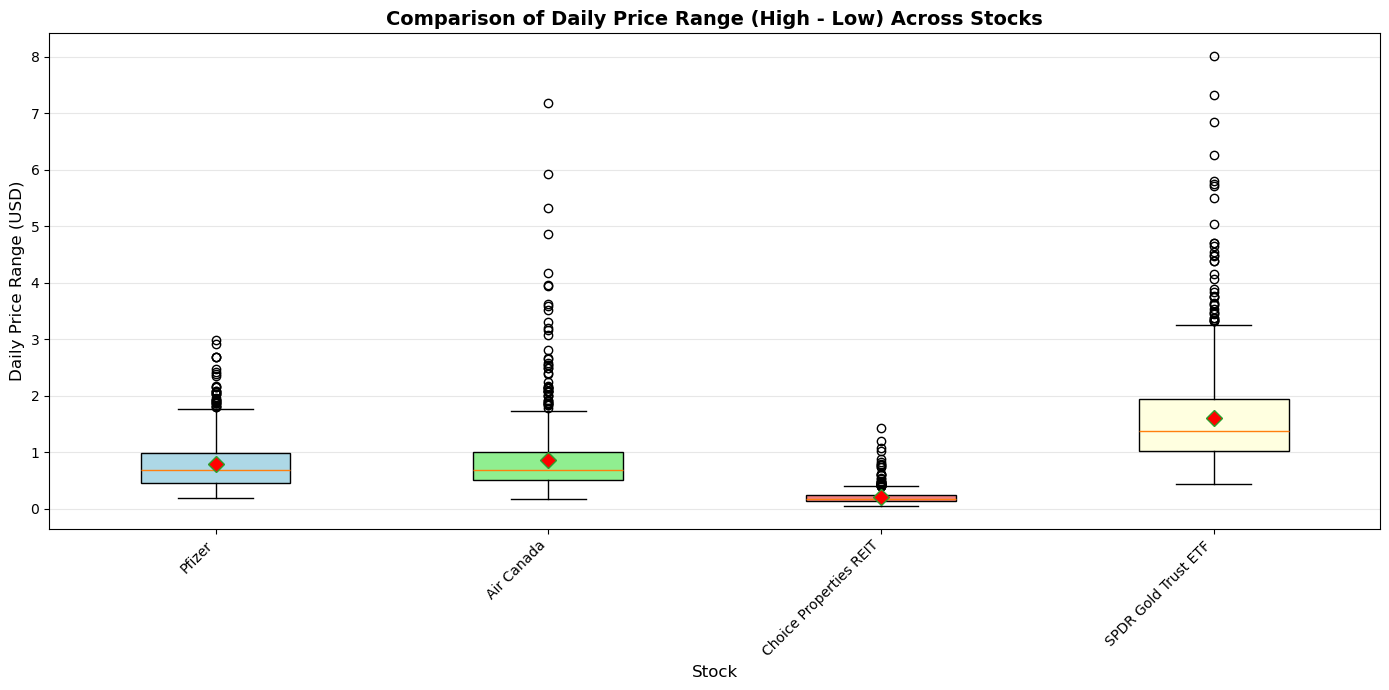

C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\2970554377.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = plt.boxplot(high_data, labels=high_labels, patch_artist=True,


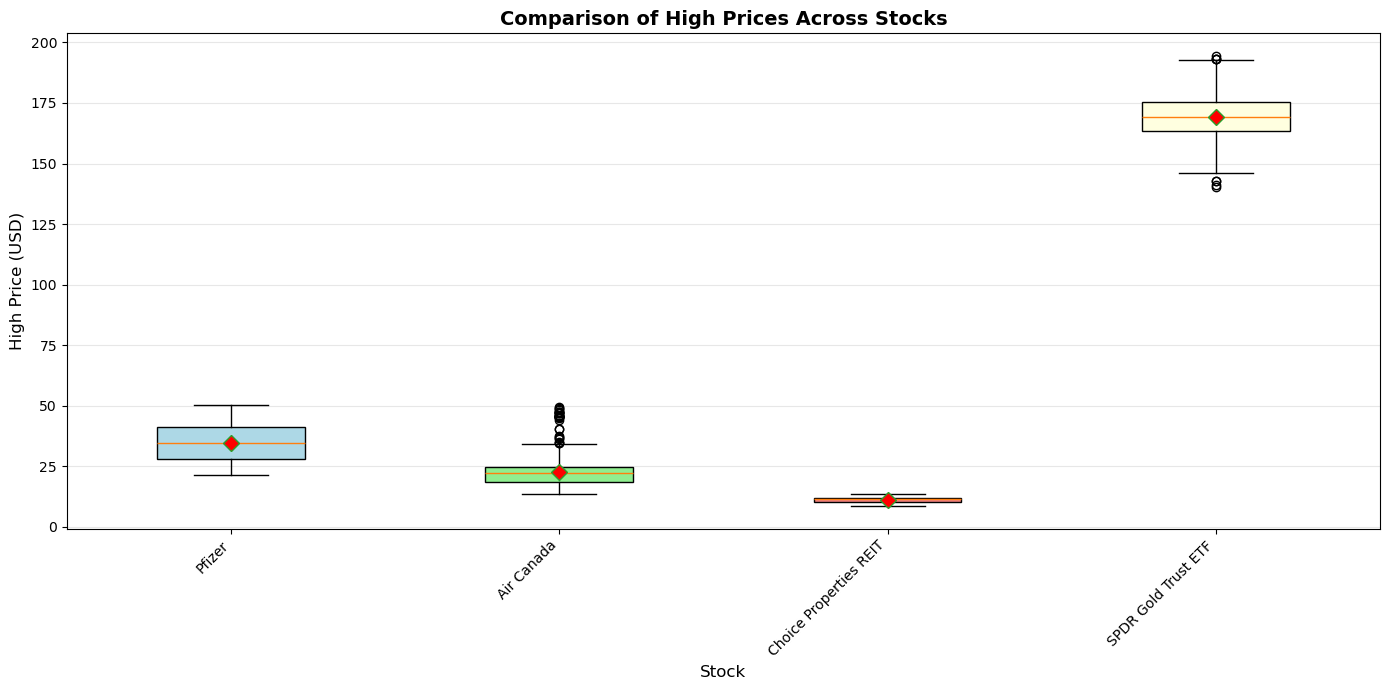

C:\Users\Admin\AppData\Local\Temp\ipykernel_20420\2970554377.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = plt.boxplot(low_data, labels=low_labels, patch_artist=True,


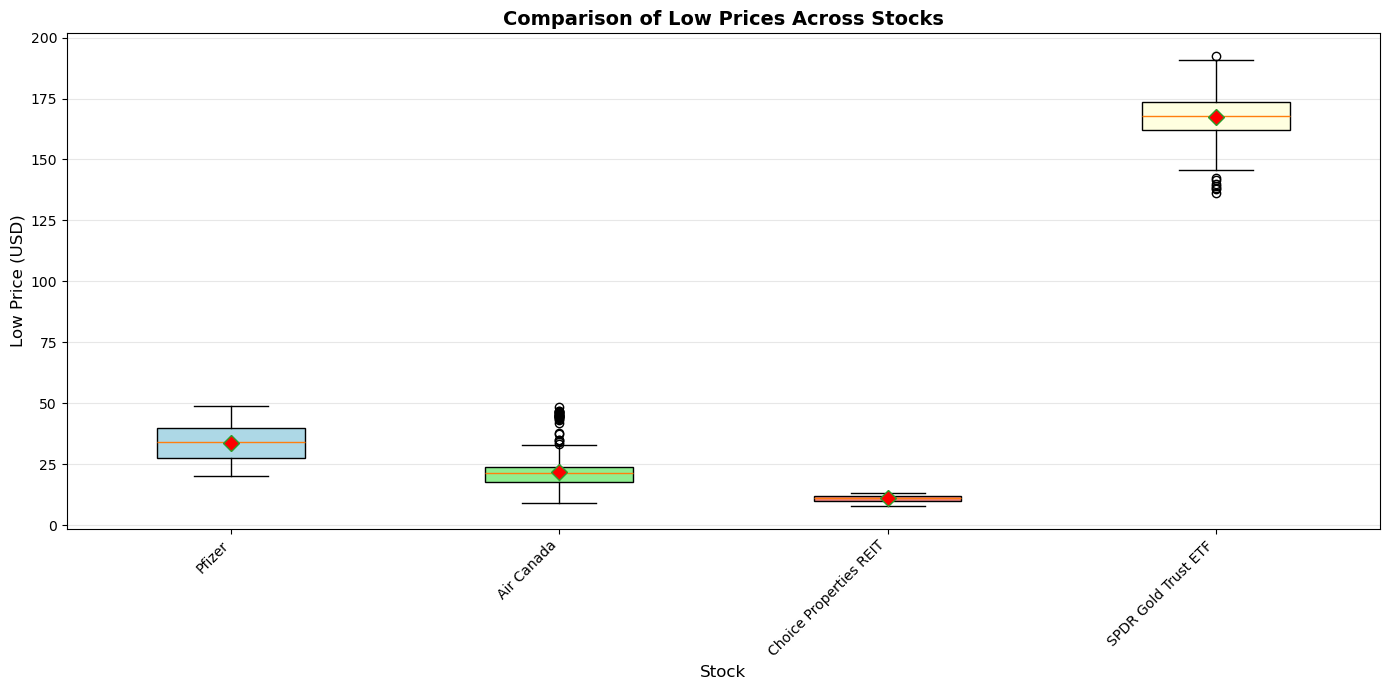


Price Variability Summary:

Pfizer:
  High Price - Mean: $34.66, Std: $6.91
  Low Price  - Mean: $33.86, Std: $6.70
  Daily Range - Mean: $0.79, Std: $0.45

Air Canada:
  High Price - Mean: $22.50, Std: $5.69
  Low Price  - Mean: $21.63, Std: $5.56
  Daily Range - Mean: $0.87, Std: $0.65

Choice Properties REIT:
  High Price - Mean: $11.19, Std: $1.12
  Low Price  - Mean: $10.99, Std: $1.15
  Daily Range - Mean: $0.20, Std: $0.13

SPDR Gold Trust ETF:
  High Price - Mean: $169.13, Std: $9.04
  Low Price  - Mean: $167.51, Std: $9.02
  Daily Range - Mean: $1.62, Std: $0.90


In [13]:
# Prepare data for boxplots
stock_ranges = []
stock_names = []
stock_highs = []
stock_lows = []
stocks.pop('S&P/TSX Composite index', None)  # Remove index from boxplot analysis
stocks.pop('Canadian Tire', None)  # Remove index from boxplot analysis

for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    
    # Handle column names
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    
    # Calculate daily price range
    daily_ranges = (stock_df[high_col] - stock_df[low_col]).dropna()
    
    # Append data
    stock_ranges.extend(daily_ranges.tolist())
    stock_names.extend([stock_name] * len(daily_ranges))
    stock_highs.extend(stock_df[high_col].dropna().tolist())
    stock_lows.extend(stock_df[low_col].dropna().tolist())

# Create DataFrame for plotting
boxplot_df = pd.DataFrame({
    'Stock': stock_names,
    'Daily_Range': stock_ranges
})

# Boxplot 1: Daily Price Range comparison
plt.figure(figsize=(14, 7))
box_parts = plt.boxplot([boxplot_df[boxplot_df['Stock'] == stock]['Daily_Range'].values 
                          for stock in stocks.keys()],
                         labels=list(stocks.keys()),
                         patch_artist=True,
                         showmeans=True,
                         meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lavender']
for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of Daily Price Range (High - Low) Across Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Daily Price Range (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Boxplot 2: High Prices comparison
high_data = []
high_labels = []
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    high_data.append(stock_df[high_col].dropna().values)
    high_labels.append(stock_name)

plt.figure(figsize=(14, 7))
box_parts = plt.boxplot(high_data, labels=high_labels, patch_artist=True, 
                         showmeans=True, meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of High Prices Across Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('High Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Boxplot 3: Low Prices comparison
low_data = []
low_labels = []
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    low_data.append(stock_df[low_col].dropna().values)
    low_labels.append(stock_name)

plt.figure(figsize=(14, 7))
box_parts = plt.boxplot(low_data, labels=low_labels, patch_artist=True, 
                         showmeans=True, meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of Low Prices Across Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Low Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPrice Variability Summary:")
print("="*80)
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    daily_range = stock_df[high_col] - stock_df[low_col]
    
    print(f"\n{stock_name}:")
    print(f"  High Price - Mean: ${stock_df[high_col].mean():.2f}, Std: ${stock_df[high_col].std():.2f}")
    print(f"  Low Price  - Mean: ${stock_df[low_col].mean():.2f}, Std: ${stock_df[low_col].std():.2f}")
    print(f"  Daily Range - Mean: ${daily_range.mean():.2f}, Std: ${daily_range.std():.2f}")


**Graph Choice**

Boxplots were used to compare price variability across selected stocks, using High, Low, and Daily Range values. Boxplots show medians, spread, and outliers, making differences in volatility across stocks clear.

**Insights from the Data**

Pfizer and Air Canada exhibit moderate volatility, with daily ranges around $0.79 and $0.87 respectively.

Choice Properties REIT is very stable, with a small daily range (Mean: $0.20) and low standard deviation.

SPDR Gold Trust ETF shows higher absolute price levels but moderate variability (Daily Range Mean: $1.62).

**Observed Patterns**

Stocks with higher sector sensitivity, like Air Canada, have slightly wider daily ranges compared to more stable sectors such as REITs.

Standard deviations confirm that Choice Properties REIT is the least volatile, while ETFs and pharma stocks show more day-to-day variation.

Daily range differences highlight typical market behavior and sector-specific risk.

4. Scatter Plots:
   - Produce scatter plots to analyze potential relationships between COVID-19 global cases (Confirmed or Deaths) and stock prices for selected industries or tickers.


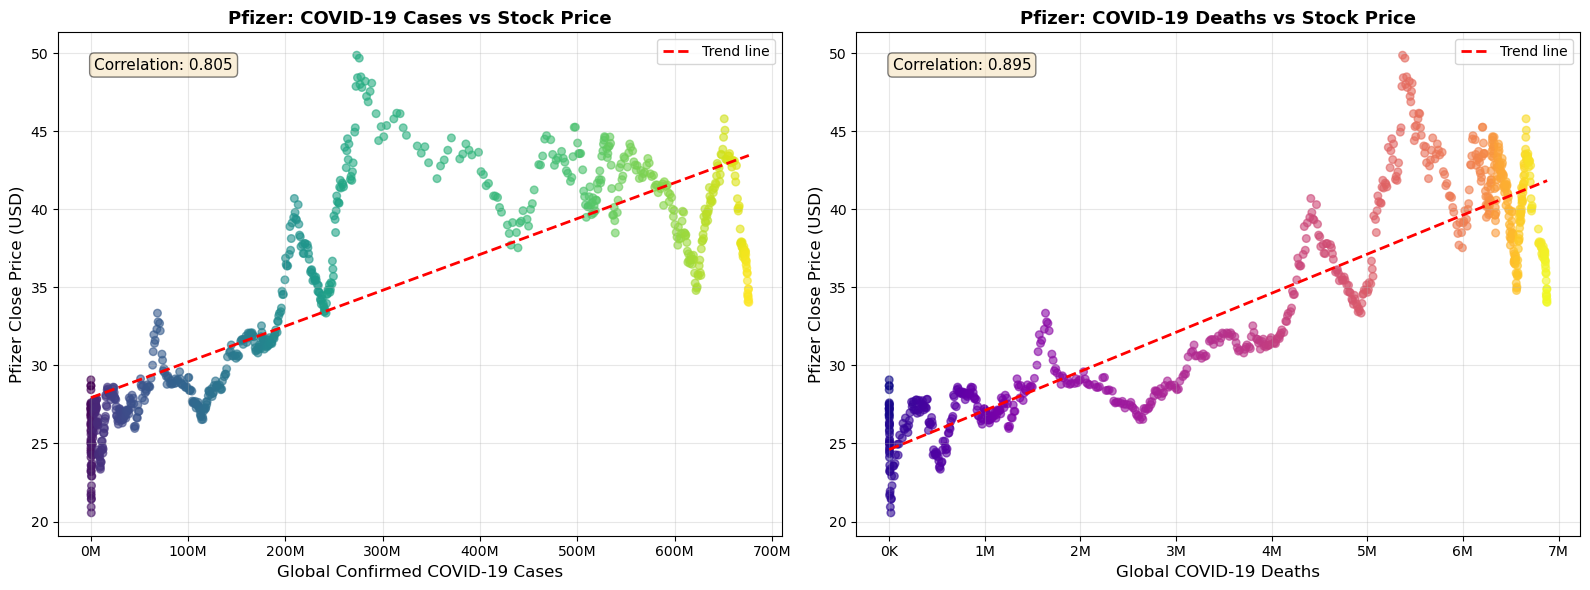


Pfizer Correlation Analysis:
  Confirmed Cases vs Close Price: 0.8053
  Deaths vs Close Price: 0.8947
  Data points: 788
  Date range: 2020-01-22 to 2023-03-08


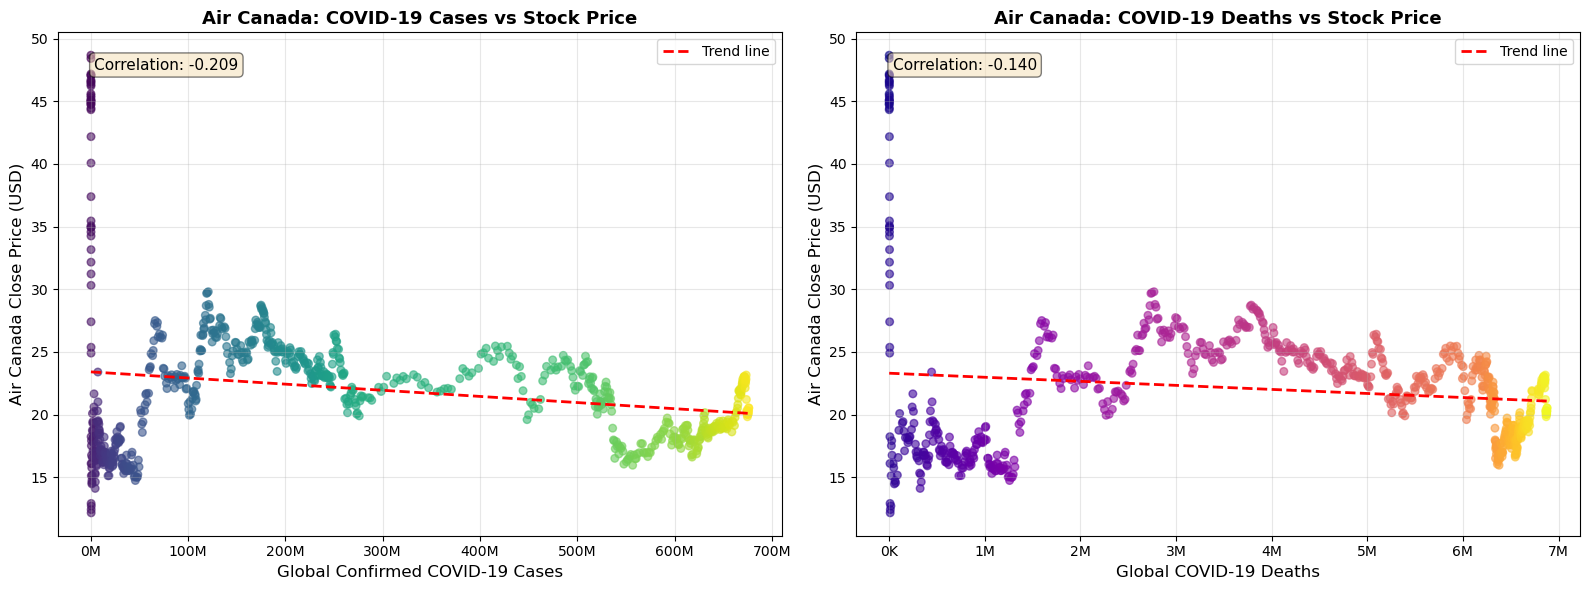


Air Canada Correlation Analysis:
  Confirmed Cases vs Close Price: -0.2089
  Deaths vs Close Price: -0.1404
  Data points: 785
  Date range: 2020-01-22 to 2023-03-08


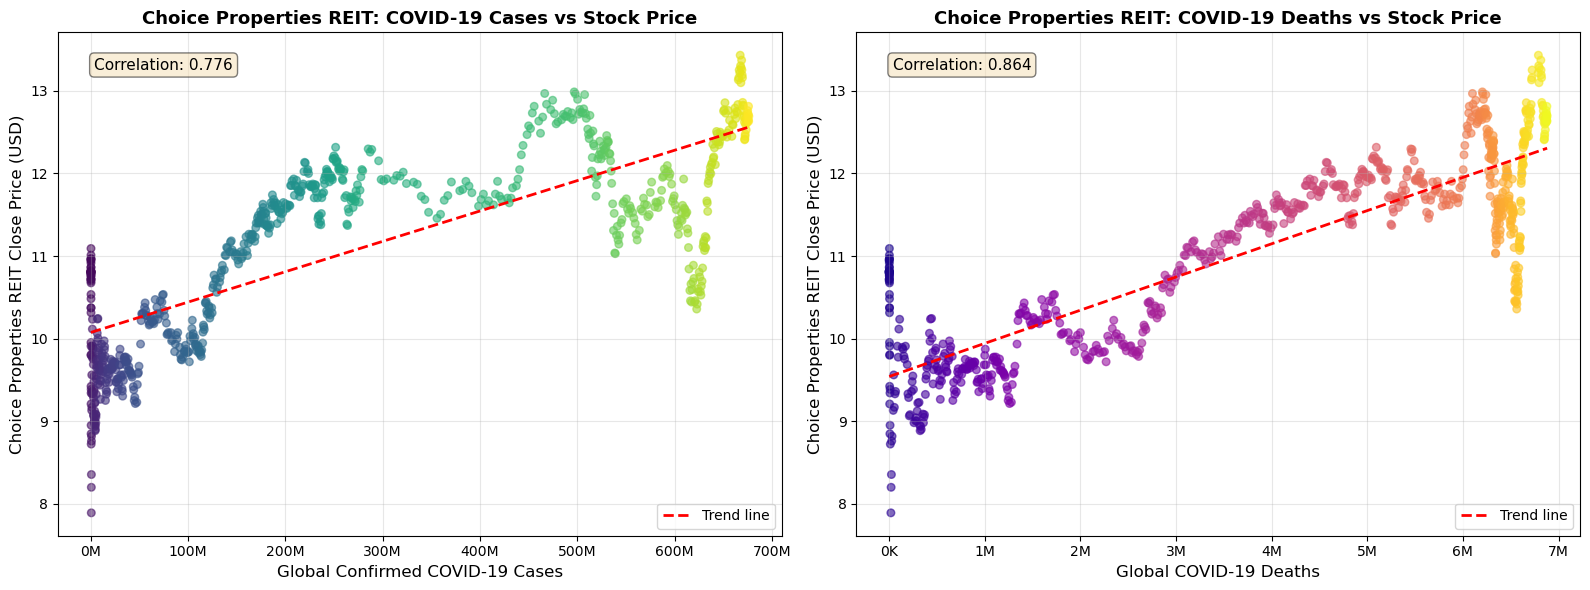


Choice Properties REIT Correlation Analysis:
  Confirmed Cases vs Close Price: 0.7763
  Deaths vs Close Price: 0.8637
  Data points: 785
  Date range: 2020-01-22 to 2023-03-08


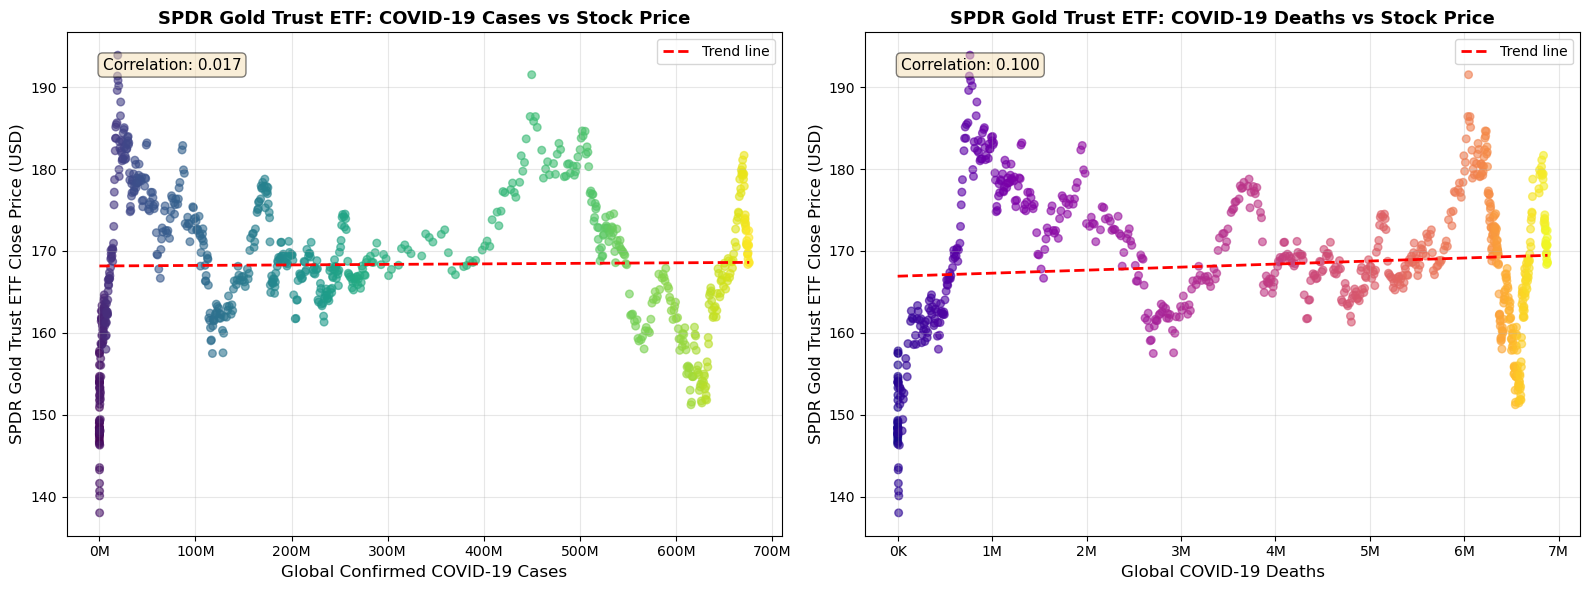


SPDR Gold Trust ETF Correlation Analysis:
  Confirmed Cases vs Close Price: 0.0170
  Deaths vs Close Price: 0.0995
  Data points: 788
  Date range: 2020-01-22 to 2023-03-08

CORRELATION SUMMARY - COVID-19 Impact on Stock Prices
Stock                          Cases vs Price       Deaths vs Price     
--------------------------------------------------------------------------------
Pfizer                                     0.8053              0.8947
Air Canada                                -0.2089             -0.1404
Choice Properties REIT                     0.7763              0.8637
SPDR Gold Trust ETF                        0.0170              0.0995


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Prepare combined global COVID-19 data
global_covid = confirmed_cases_format.groupby('Date')['Confirmed'].sum().reset_index()
global_covid_deaths = deaths_format.groupby('Date')['Deaths'].sum().reset_index()
global_covid = global_covid.merge(global_covid_deaths, on='Date', how='left')
global_covid['Date'] = pd.to_datetime(global_covid['Date'], errors='coerce')
global_covid = global_covid.dropna(subset=['Date'])

for stock_name, symbol in stocks.items():
    # Filter stock data
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    
    if stock_df.empty:
        print(f"No stock data for {stock_name}")
        continue

    # Ensure 'Date' column exists
    if 'Date' not in stock_df.columns:
        stock_df = stock_df.reset_index()
        stock_df = stock_df.rename(columns={stock_df.columns[0]: 'Date'})
    
    stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
    stock_df = stock_df.dropna(subset=['Date'])
    
    # Handle OHLC columns
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    close_col = 'Close' if 'Close' in stock_df.columns else f'Close_{symbol}'
    
    for col in [high_col, low_col, close_col]:
        if col not in stock_df.columns:
            print(f"Missing column {col} for {stock_name}, skipping...")
            continue
        stock_df[col] = pd.to_numeric(stock_df[col], errors='coerce')
    
    # Merge with COVID data
    merged_df = stock_df.merge(global_covid, on='Date', how='inner')
    
    if merged_df.empty:
        print(f"No matching dates for {stock_name}")
        continue

    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Scatter 1: Confirmed vs Close Price
    scatter1 = ax1.scatter(
        merged_df['Confirmed'], merged_df[close_col],
        c=merged_df.index, cmap='viridis', alpha=0.6, s=30
    )
    ax1.set_xlabel('Global Confirmed COVID-19 Cases', fontsize=12)
    ax1.set_ylabel(f'{stock_name} Close Price (USD)', fontsize=12)
    ax1.set_title(f'{stock_name}: COVID-19 Cases vs Stock Price', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    corr1 = merged_df['Confirmed'].corr(merged_df[close_col])
    ax1.text(0.05, 0.95, f'Correlation: {corr1:.3f}', transform=ax1.transAxes,
             fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    z1 = np.polyfit(merged_df['Confirmed'], merged_df[close_col], 1)
    p1 = np.poly1d(z1)
    ax1.plot(merged_df['Confirmed'], p1(merged_df['Confirmed']), "r--", linewidth=2, label='Trend line')
    ax1.legend()
    ax1.ticklabel_format(style='plain', axis='x')
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6):.0f}M'))

    # Scatter 2: Deaths vs Close Price
    scatter2 = ax2.scatter(
        merged_df['Deaths'], merged_df[close_col],
        c=merged_df.index, cmap='plasma', alpha=0.6, s=30
    )
    ax2.set_xlabel('Global COVID-19 Deaths', fontsize=12)
    ax2.set_ylabel(f'{stock_name} Close Price (USD)', fontsize=12)
    ax2.set_title(f'{stock_name}: COVID-19 Deaths vs Stock Price', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    corr2 = merged_df['Deaths'].corr(merged_df[close_col])
    ax2.text(0.05, 0.95, f'Correlation: {corr2:.3f}', transform=ax2.transAxes,
             fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    z2 = np.polyfit(merged_df['Deaths'], merged_df[close_col], 1)
    p2 = np.poly1d(z2)
    ax2.plot(merged_df['Deaths'], p2(merged_df['Deaths']), "r--", linewidth=2, label='Trend line')
    ax2.legend()
    ax2.ticklabel_format(style='plain', axis='x')
    ax2.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f'{int(x/1e6):.0f}M' if x >= 1e6 else f'{int(x/1e3):.0f}K')
    )

    plt.tight_layout()
    plt.show()

    print(f"\n{stock_name} Correlation Analysis:")
    print(f"  Confirmed Cases vs Close Price: {corr1:.4f}")
    print(f"  Deaths vs Close Price: {corr2:.4f}")
    print(f"  Data points: {len(merged_df)}")
    print(f"  Date range: {merged_df['Date'].min().strftime('%Y-%m-%d')} to {merged_df['Date'].max().strftime('%Y-%m-%d')}")

# Summary of correlations
print("\n" + "="*80)
print("CORRELATION SUMMARY - COVID-19 Impact on Stock Prices")
print("="*80)
print(f"{'Stock':<30} {'Cases vs Price':<20} {'Deaths vs Price':<20}")
print("-"*80)

for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    if 'Date' not in stock_df.columns:
        stock_df = stock_df.reset_index()
        stock_df = stock_df.rename(columns={stock_df.columns[0]: 'Date'})
    stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')
    stock_df = stock_df.dropna(subset=['Date'])

    close_col = 'Close' if 'Close' in stock_df.columns else f'Close_{symbol}'
    merged_df = stock_df.merge(global_covid, on='Date', how='inner')

    if len(merged_df) > 0:
        corr_cases = merged_df['Confirmed'].corr(merged_df[close_col])
        corr_deaths = merged_df['Deaths'].corr(merged_df[close_col])
        print(f"{stock_name:<30} {corr_cases:>18.4f}  {corr_deaths:>18.4f}")


**Graph Choice**

Scatter plots were used to explore potential relationships between global COVID-19 cases or deaths and stock closing prices. Scatter plots are ideal for identifying correlations and visual trends between two quantitative variables.

**Insights from the Data**

Pfizer and Choice Properties REIT show strong positive correlations with both confirmed cases and deaths (Pfizer: 0.81 & 0.89, REIT: 0.78 & 0.86), suggesting that their stock prices tended to rise as global COVID-19 cases increased.

Air Canada shows a slight negative correlation with cases and deaths (-0.21 & -0.14), reflecting the adverse impact of the pandemic on the airline industry.

SPDR Gold Trust ETF shows almost no correlation (0.02 & 0.10), indicating that gold prices were largely unaffected by the number of COVID-19 cases or deaths.

**Observed Patterns**

Stocks in healthcare and real estate sectors benefited or remained resilient during periods of rising COVID-19 cases.

Stocks in travel-related sectors were negatively impacted, aligning with industry-specific risks.

The correlation values highlight that the pandemic’s impact on stock prices was sector-dependent, with some stocks positively correlated to pandemic intensity while others declined.

5. Bar Charts:
  - Compare the average stock price movements during different phases of the pandemic (e.g., initial outbreak, peak, recovery).


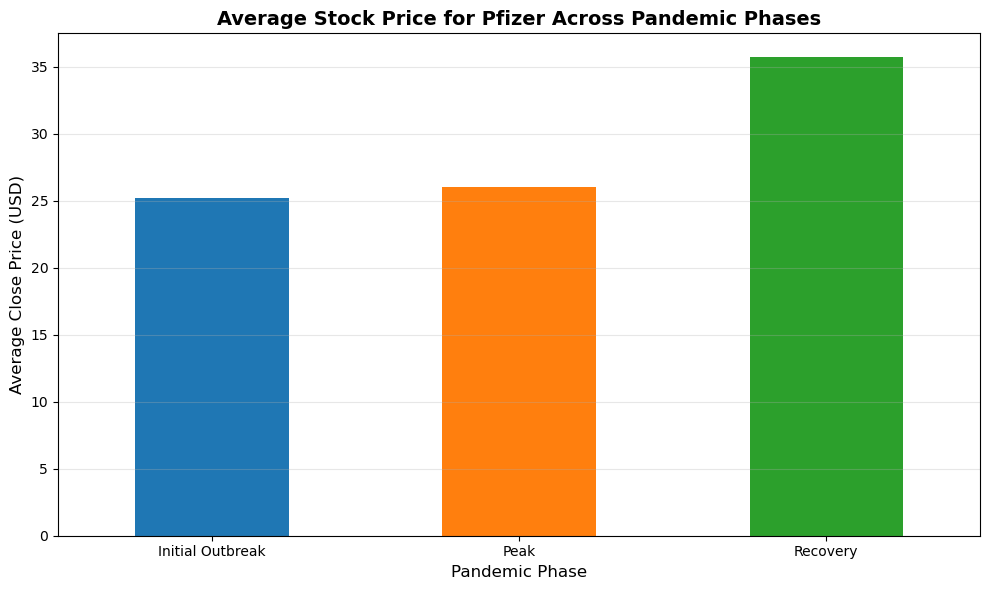

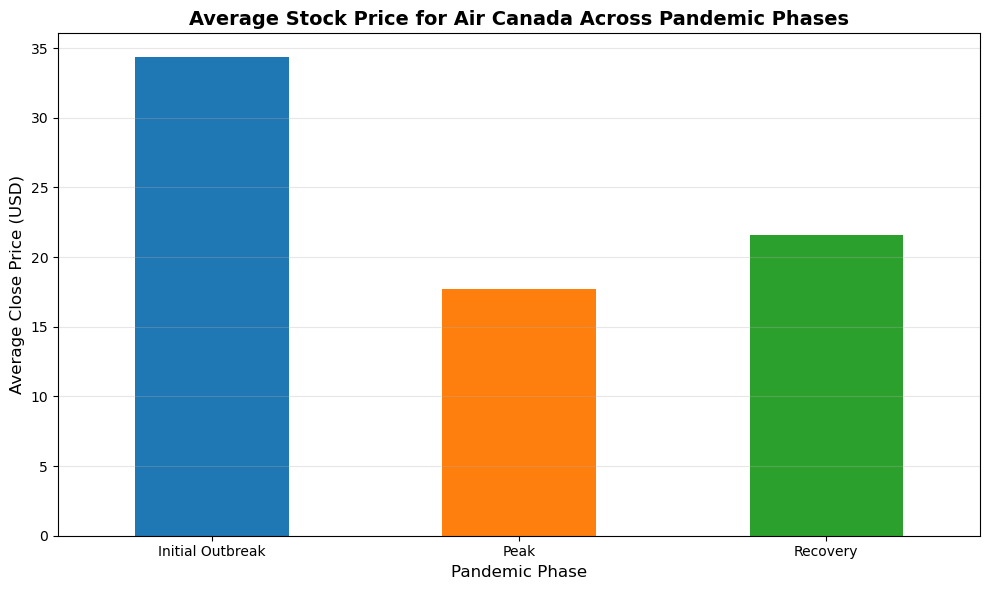

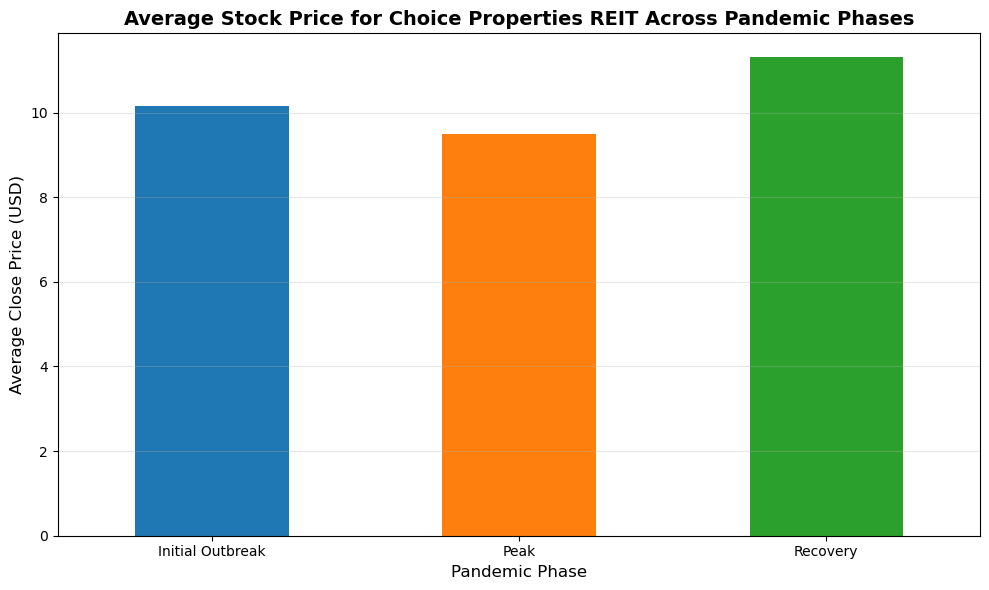

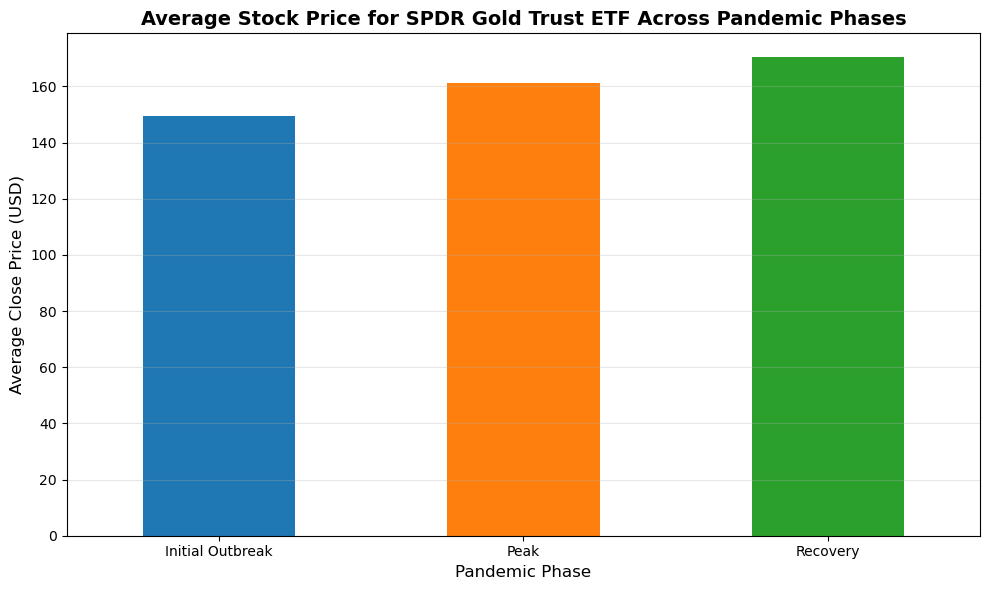

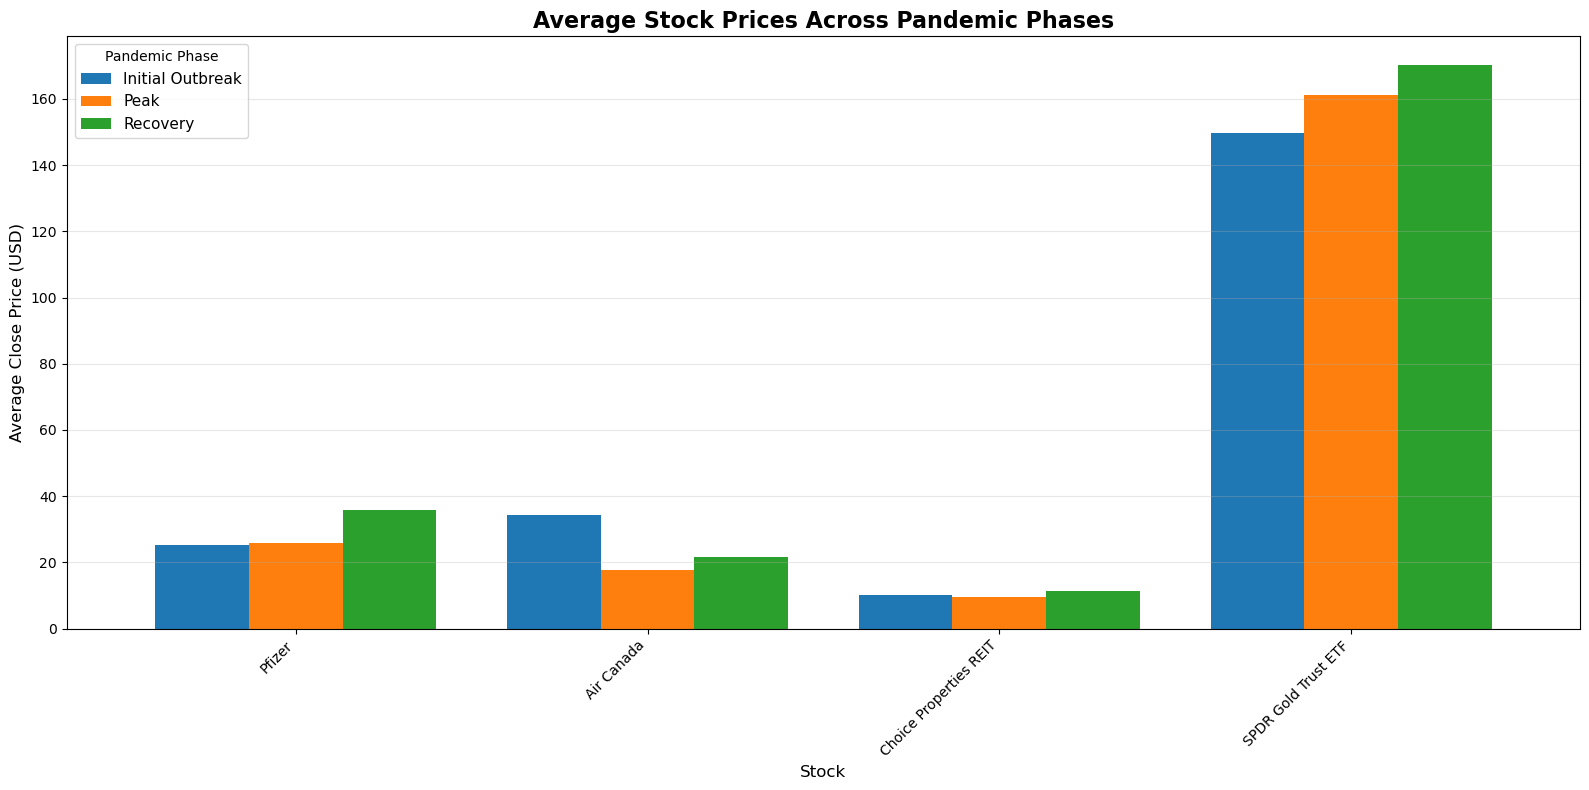

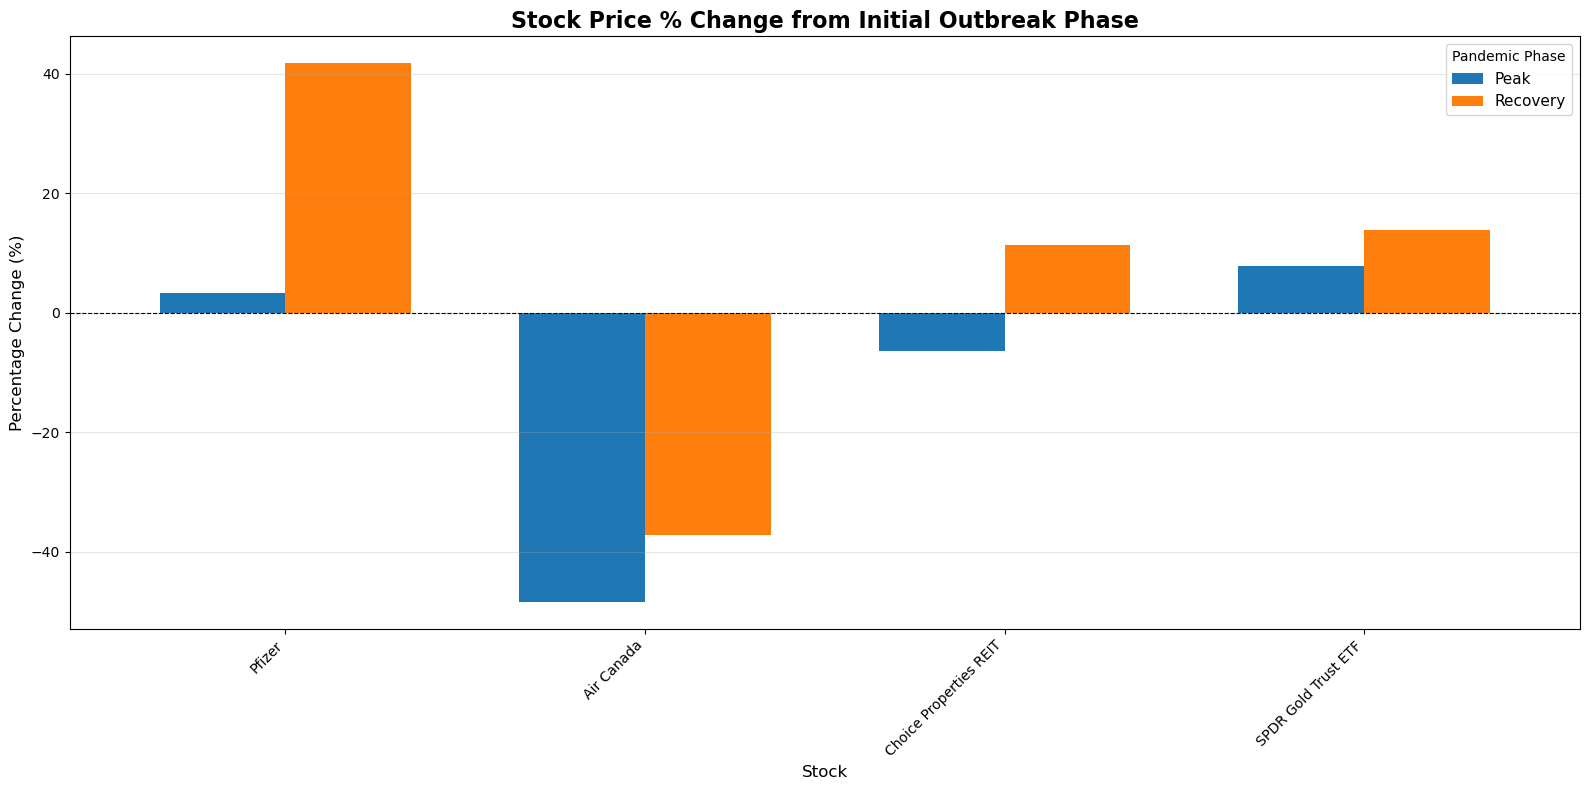


Average Stock Prices Across Pandemic Phases:
                        Initial Outbreak        Peak    Recovery
Pfizer                         25.173965   25.990750   35.694516
Air Canada                     34.336530   17.721746   21.558158
Choice Properties REIT         10.160476    9.504854   11.308540
SPDR Gold Trust ETF           149.566938  161.285713  170.366035

Percentage Change from Initial Outbreak Phase (%):
                             Peak   Recovery
Pfizer                   3.244561  41.791395
Air Canada             -48.388070 -37.215097
Choice Properties REIT  -6.452668  11.299313
SPDR Gold Trust ETF      7.835137  13.906213


In [15]:
# 5. Bar Charts:
# Compare the average stock price movements during different phases of the pandemic

import numpy as np

# Define pandemic phases based on global COVID-19 trends
phases = {
    'Initial Outbreak': ('2020-01-22', '2020-03-31'),      # Early pandemic emergence
    'Peak': ('2020-04-01', '2020-06-30'),                  # First wave peak period
    'Recovery': ('2020-07-01', '2023-03-09')               # Recovery phase through end of data
}

# Calculate average stock prices for each phase
phase_avg_prices = {}
for phase, (start, end) in phases.items():
    phase_df = stock_data_filtered[(stock_data_filtered['Date'] >= start) & (stock_data_filtered['Date'] <= end)]
    
    avg_prices = {}
    for stock_name, symbol in stocks.items():
        stock_df = phase_df[phase_df['Stock'] == stock_name]
        close_col = 'Close' if 'Close' in stock_df.columns else f'Close_{symbol}'
        
        if not stock_df.empty:
            avg_prices[stock_name] = stock_df[close_col].mean()
        else:
            avg_prices[stock_name] = 0  # Handle cases with no data
            
    phase_avg_prices[phase] = avg_prices

# Convert to DataFrame for easier plotting
phase_df = pd.DataFrame(phase_avg_prices)
phase_df = phase_df.drop('S&P/TSX Composite index', errors='ignore')  # Remove index if present

# --- Visualization 1: Average Price per Phase for Each Stock ---
for stock_name in stocks.keys():
    if stock_name in phase_df.index:
        plt.figure(figsize=(10, 6))
        phase_df.loc[stock_name].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], rot=0)
        plt.title(f'Average Stock Price for {stock_name} Across Pandemic Phases', fontsize=14, fontweight='bold')
        plt.xlabel('Pandemic Phase', fontsize=12)
        plt.ylabel('Average Close Price (USD)', fontsize=12)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

# --- Visualization 2: Grouped Bar Chart Comparing All Stocks ---
phase_df.plot(kind='bar', figsize=(16, 8), width=0.8)
plt.title('Average Stock Prices Across Pandemic Phases', fontsize=16, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Average Close Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pandemic Phase', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# --- Visualization 3: Percentage Change from Initial Outbreak ---
# Calculate percentage change relative to the 'Initial Outbreak' phase
initial_prices = phase_df['Initial Outbreak']
percentage_change_df = phase_df.apply(lambda x: (x - initial_prices) / initial_prices * 100, axis=0)

# Drop the 'Initial Outbreak' column as it will be all zeros
percentage_change_df = percentage_change_df.drop(columns=['Initial Outbreak'])

percentage_change_df.plot(kind='bar', figsize=(16, 8), width=0.7)
plt.title('Stock Price % Change from Initial Outbreak Phase', fontsize=16, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # Zero line
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pandemic Phase', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print the data
print("\nAverage Stock Prices Across Pandemic Phases:")
print(phase_df)
print("\nPercentage Change from Initial Outbreak Phase (%):")
print(percentage_change_df)

**Graph Choice**

Bar charts were used to compare average stock prices across different pandemic phases: Initial Outbreak, Peak, and Recovery. Bar charts clearly show differences across discrete periods and allow easy comparison of absolute and relative changes.

**Insights from the Data**

Pfizer experienced steady growth, increasing by ~42% from the Initial Outbreak to the Recovery phase.

Air Canada was hit hard during the Peak phase, dropping ~48% in average price, and partially recovered (~37% below initial levels).

Choice Properties REIT showed mild volatility with a small drop during Peak (-6%) and modest recovery (+11%).

SPDR Gold Trust ETF steadily increased in value through the pandemic, with a ~14% rise by the Recovery phase.

**Observed Patterns**

Stocks in healthcare and precious metals benefited or remained resilient during the pandemic.

Travel-related stocks like Air Canada were severely affected initially but recovered partially.

Comparing percentage changes highlights sector-specific impacts, with some industries thriving while others suffered significant declines during the pandemic peak.

6. Candlestick charts:
  - Create candlestick charts to display the daily price movement (open, high, low, close).
(If open/close prices are not available, you may derive or approximate them as needed.)


Creating candlestick chart for Pfizer with 788 data points...


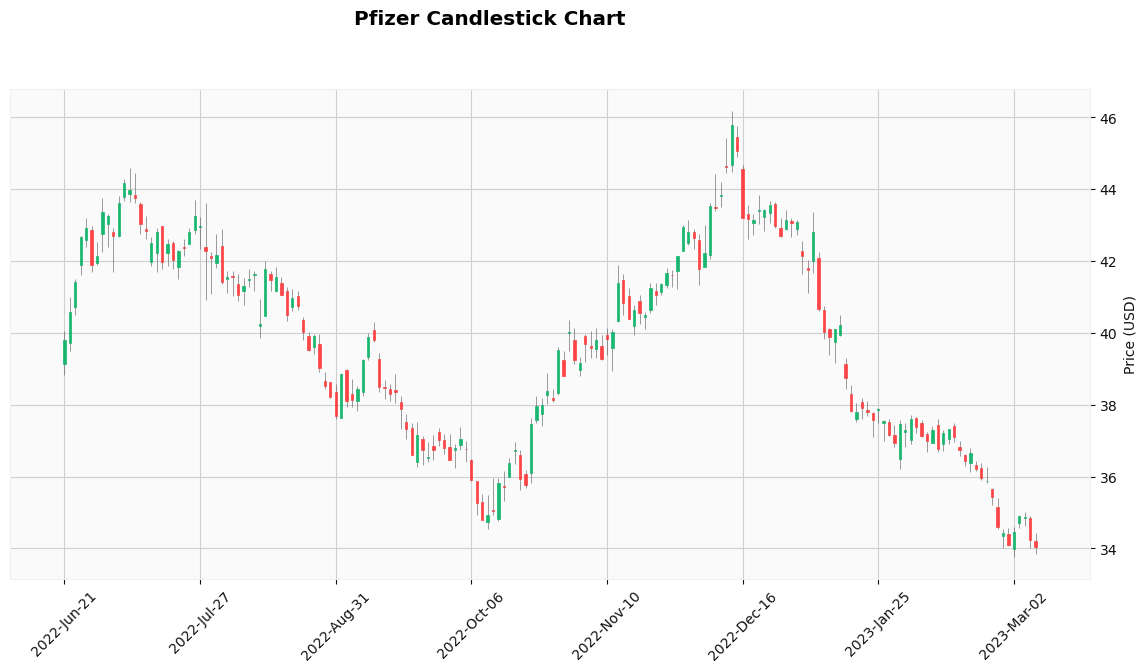

Creating candlestick chart for Air Canada with 785 data points...


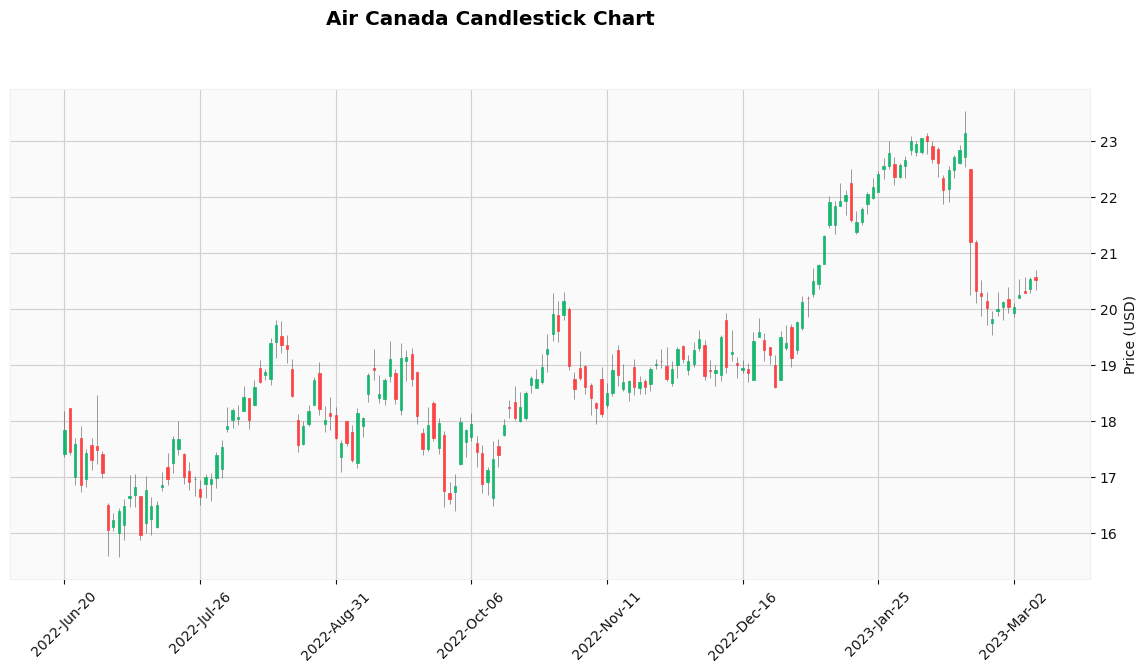

Creating candlestick chart for Choice Properties REIT with 785 data points...


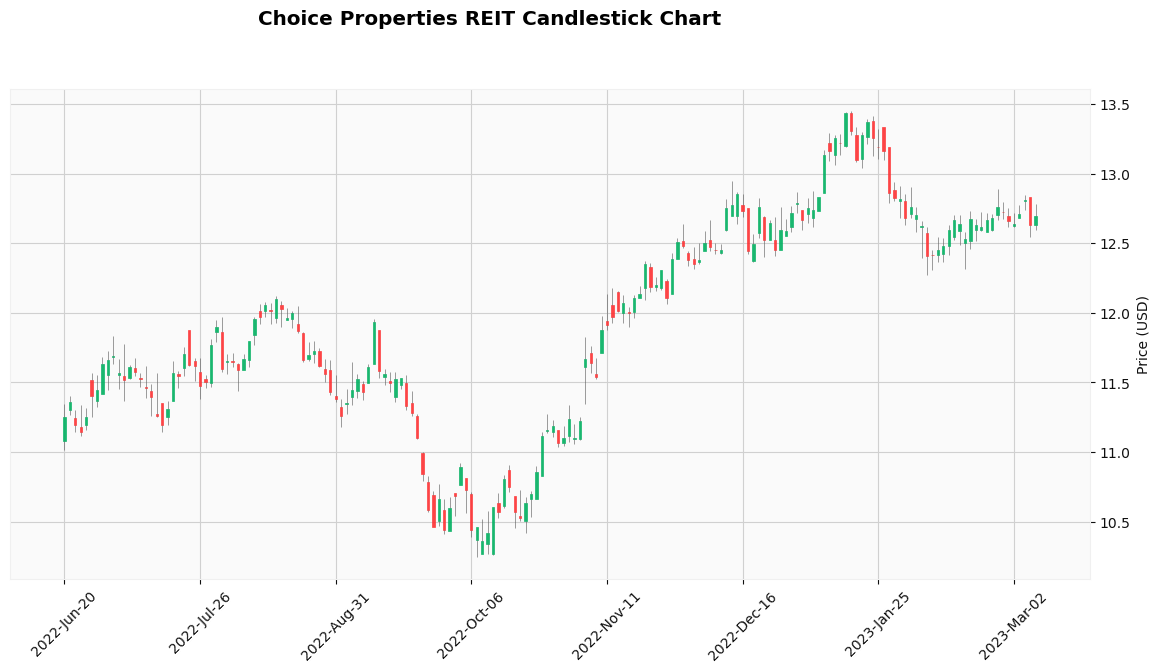

Creating candlestick chart for SPDR Gold Trust ETF with 788 data points...


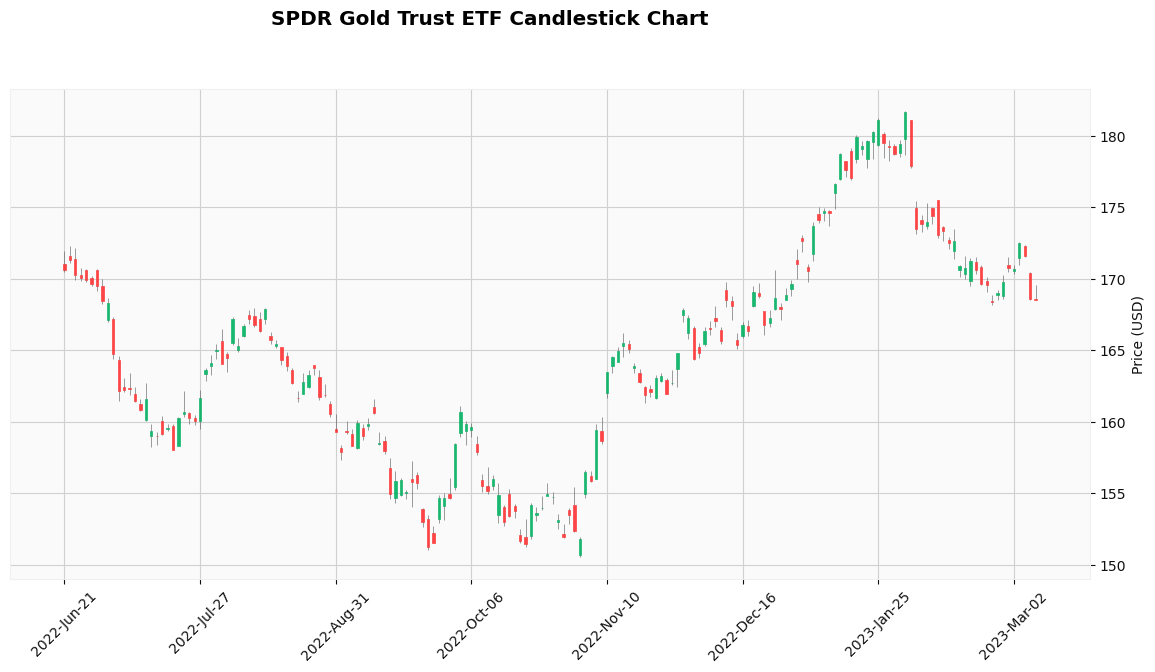

In [16]:
# 6. Candlestick Charts:
for stock_name, symbol in stocks.items():
    # Filter stock_data for the current stock
    chart_df = stock_data[stock_data['Stock'] == stock_name].copy()
    
    if chart_df.empty:
        print(f"No data available for {stock_name} to create a candlestick chart.")
        continue

    # Flatten MultiIndex columns if present
    if isinstance(chart_df.columns, pd.MultiIndex):
        chart_df.columns = ['_'.join(col).strip('_') for col in chart_df.columns.values]

    # Ensure there is a datetime column to use as index
    if 'Date' in chart_df.columns:
        chart_df['Date'] = pd.to_datetime(chart_df['Date'], errors='coerce')
        chart_df = chart_df.dropna(subset=['Date'])
        chart_df.set_index('Date', inplace=True)
    else:
        # If index is not datetime, try to convert existing index
        try:
            chart_df.index = pd.to_datetime(chart_df.index)
        except Exception as e:
            print(f"Cannot convert index to datetime for {stock_name}: {e}")
            continue

    # Select the correct OHLC columns
    open_col = f'Open_{symbol}' if f'Open_{symbol}' in chart_df.columns else 'Open'
    high_col = f'High_{symbol}' if f'High_{symbol}' in chart_df.columns else 'High'
    low_col = f'Low_{symbol}' if f'Low_{symbol}' in chart_df.columns else 'Low'
    close_col = f'Close_{symbol}' if f'Close_{symbol}' in chart_df.columns else 'Close'

    # Check if required columns exist
    missing_cols = [c for c in [open_col, high_col, low_col, close_col] if c not in chart_df.columns]
    if missing_cols:
        print(f"Missing columns {missing_cols} for {stock_name}, skipping...")
        continue

    # Build a clean dataframe for mplfinance
    ohlc_df = pd.DataFrame({
        'Open': pd.to_numeric(chart_df[open_col], errors='coerce'),
        'High': pd.to_numeric(chart_df[high_col], errors='coerce'),
        'Low': pd.to_numeric(chart_df[low_col], errors='coerce'),
        'Close': pd.to_numeric(chart_df[close_col], errors='coerce')
    }, index=chart_df.index)

    # Drop rows with any NaN values
    ohlc_df = ohlc_df.dropna()
    if ohlc_df.empty:
        print(f"No valid OHLC data for {stock_name}, skipping...")
        continue

    print(f"Creating candlestick chart for {stock_name} with {len(ohlc_df)} data points...")

    # Plot the last 180 data points for readability
    mpf.plot(
        ohlc_df.tail(180),
        type='candle',
        style='yahoo',
        title=f'{stock_name} Candlestick Chart',
        ylabel='Price (USD)',
        figsize=(15, 7)
    )


**Graph Choice**

Candlestick charts were used to display the daily price movements (Open, High, Low, Close) for each stock. Candlesticks effectively show the direction, magnitude, and volatility of price changes within each trading day, making short-term trends and reversals easy to identify.

**Insights from the Data**

Each candlestick represents a single day’s trading, highlighting price gaps, intraday swings, and trend direction.

Stocks with larger daily ranges (tall candlesticks) indicate higher volatility, while smaller candlesticks suggest stable trading days.

Patterns such as consecutive bullish or bearish candlesticks reveal sustained upward or downward trends over the selected period.

**Observed Patterns**

Pfizer and SPDR Gold Trust ETF generally show stable candlesticks with occasional spikes, reflecting moderate volatility.

Air Canada has frequent tall candlesticks, highlighting sector-specific volatility during the pandemic.

Candlestick charts complement the previous visualizations by providing a detailed day-to-day view of stock price behavior, which is not visible in line graphs or bar charts.